In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
application_data = pd.read_csv('application_data.csv')
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
application_data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [4]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [14]:
(application_data.isnull().sum()/len(application_data.index))*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [15]:
## Now we can remove/drop such columns which has missing values more than 50%.

In [16]:
drop_column = ['COMMONAREA_MEDI','COMMONAREA_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MEDI','FONDKAPREMONT_MODE','LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_MEDI','FLOORSMIN_AVG','FLOORSMIN_MODE','FLOORSMIN_MEDI','YEARS_BUILD_MEDI','YEARS_BUILD_MODE','YEARS_BUILD_AVG','OWN_CAR_AGE','LANDAREA_MEDI','LANDAREA_MODE','LANDAREA_AVG','BASEMENTAREA_MEDI','BASEMENTAREA_AVG','BASEMENTAREA_MODE','EXT_SOURCE_1','NONLIVINGAREA_MODE','NONLIVINGAREA_AVG','NONLIVINGAREA_MEDI','ELEVATORS_MEDI','ELEVATORS_AVG','ELEVATORS_MODE','WALLSMATERIAL_MODE','APARTMENTS_MEDI','APARTMENTS_AVG','APARTMENTS_MODE','ENTRANCES_MEDI','ENTRANCES_AVG','ENTRANCES_MODE','LIVINGAREA_AVG','LIVINGAREA_MODE','LIVINGAREA_MEDI','HOUSETYPE_MODE']

In [17]:
## Using drop() function to drop unwanted columns. 
application_data = application_data.drop(drop_column,axis=1)

In [148]:
application_data.shape

(307511, 81)

In [149]:
## Now we can check whether the column with > 50% missing values removed or not.
(application_data.isnull().sum()/len(application_data.index))*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

In [ ]:
## After dropping >50% missing values columns,now we treat remaining columns.

In [ ]:
## Treating column (AMT_ANNUITY)

In [150]:
application_data['AMT_ANNUITY'].head()

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64

In [151]:
application_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [ ]:
## Now we can plot histogram with having missing values.

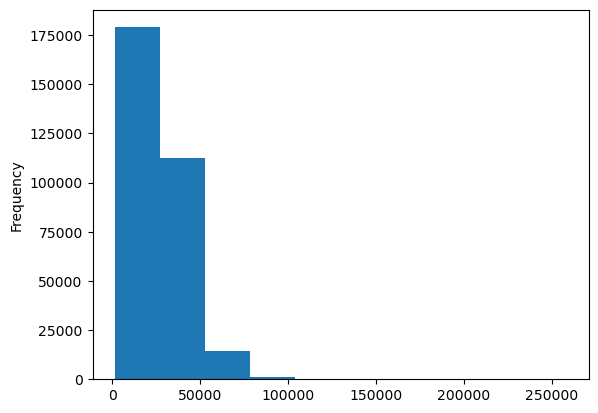

In [12]:
application_data['AMT_ANNUITY'].plot.hist()
plt.show()

In [13]:
application_data['AMT_ANNUITY'].median()

24903.0

In [64]:
## Now we can fill the missing place with median.

In [18]:
application_data['AMT_ANNUITY'] = application_data['AMT_ANNUITY'].fillna(application_data['AMT_ANNUITY'].median())

In [66]:
## Now we can all the missing value are filled or not.

In [19]:
application_data['AMT_ANNUITY'].isnull().sum()

0

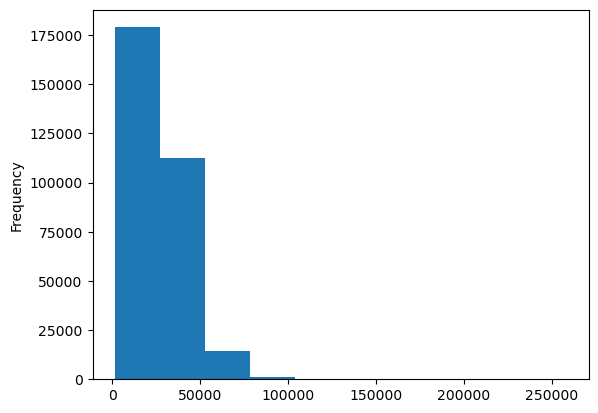

In [69]:
application_data['AMT_ANNUITY'].plot.hist()
plt.show()

In [70]:
## Now we can check whether there is any outlier or not by boxplot graph.

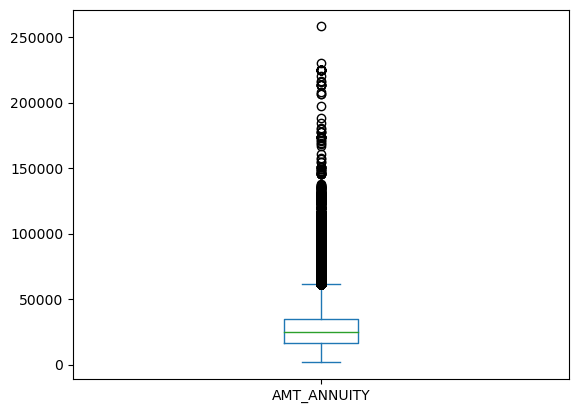

In [21]:
application_data['AMT_ANNUITY'].plot.box().figsize=[12,12]
plt.show()

In [20]:
(application_data.isnull().sum()/len(application_data.index))*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

In [76]:
## Now we follow these steps as above to fill all missing values according to columns.

In [77]:
## Treating column(AMT_GOODS_PRICE)

In [22]:
application_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

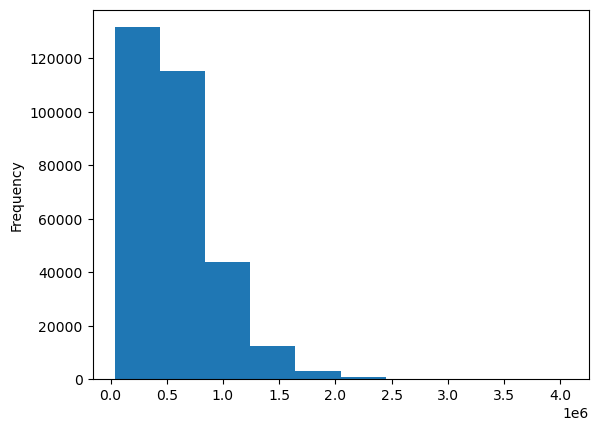

In [23]:
application_data['AMT_GOODS_PRICE'].plot.hist()
plt.show()

In [21]:
application_data['AMT_GOODS_PRICE'] = application_data['AMT_GOODS_PRICE'].fillna(application_data['AMT_GOODS_PRICE'].median())

In [22]:
application_data['AMT_GOODS_PRICE'].isnull().sum()

0

In [23]:
(application_data.isnull().sum()/len(application_data.index))*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

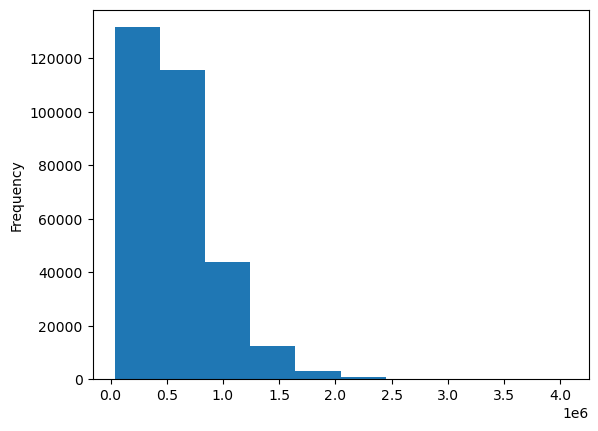

In [26]:
application_data['AMT_GOODS_PRICE'].plot.hist()
plt.show()

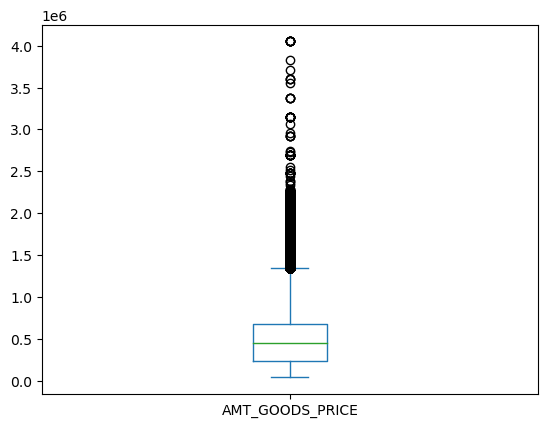

In [27]:
application_data['AMT_GOODS_PRICE'].plot.box()
plt.show()

In [88]:
## Treating column(NAME_TYPE_SUITE)

In [22]:
application_data['NAME_TYPE_SUITE'].head()

0    Unaccompanied
1           Family
2    Unaccompanied
3    Unaccompanied
4    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [23]:
application_data['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [24]:
application_data['NAME_TYPE_SUITE'] = application_data['NAME_TYPE_SUITE'].fillna("Unaccompanied")

In [25]:
application_data['NAME_TYPE_SUITE'].isnull().sum()

0

In [157]:
(application_data.isnull().sum()/len(application_data.index))*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

In [94]:
### Treating column(OCCUPATION_TYPE)

In [26]:
application_data['OCCUPATION_TYPE'].head(20)

0        Laborers
1      Core staff
2        Laborers
3        Laborers
4      Core staff
5        Laborers
6     Accountants
7        Managers
8             NaN
9        Laborers
10     Core staff
11            NaN
12       Laborers
13        Drivers
14       Laborers
15       Laborers
16        Drivers
17       Laborers
18       Laborers
19     Core staff
Name: OCCUPATION_TYPE, dtype: object

In [96]:
application_data['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [97]:
application_data['OCCUPATION_TYPE'].isnull().sum()

96391

In [27]:
application_data['OCCUPATION_TYPE'] = application_data['OCCUPATION_TYPE'].fillna('staff')

In [159]:
application_data['OCCUPATION_TYPE'].isnull().sum()

0

In [160]:
application_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 81, dtype: int64

In [4]:
### Treating column(CNT_FAM_MEMBERS)

In [27]:
application_data['CNT_FAM_MEMBERS'].isnull().sum()

2

In [6]:
application_data['CNT_FAM_MEMBERS'].head()

0    1.0
1    2.0
2    1.0
3    2.0
4    1.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [161]:
application_data['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [8]:
application_data['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

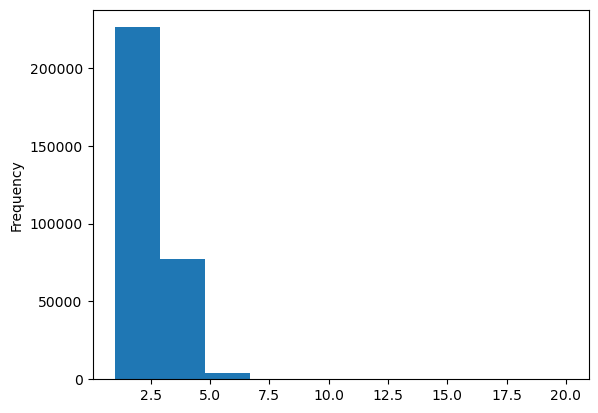

In [10]:
application_data['CNT_FAM_MEMBERS'].plot.hist()
plt.show()

In [28]:
application_data['CNT_FAM_MEMBERS'] = application_data['CNT_FAM_MEMBERS'].fillna(application_data['CNT_FAM_MEMBERS'].median())

In [163]:
application_data['CNT_FAM_MEMBERS'].isnull().sum()

0

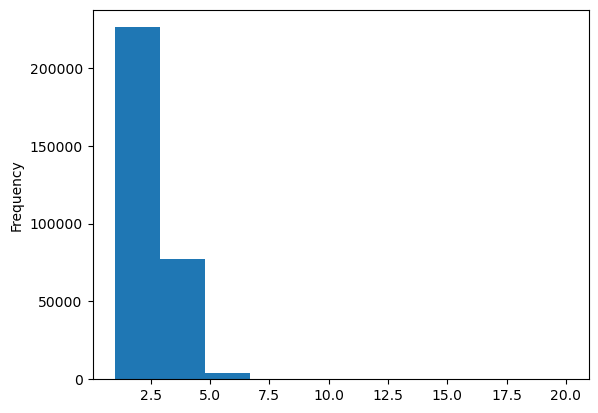

In [30]:
application_data['CNT_FAM_MEMBERS'].plot.hist()
plt.show()

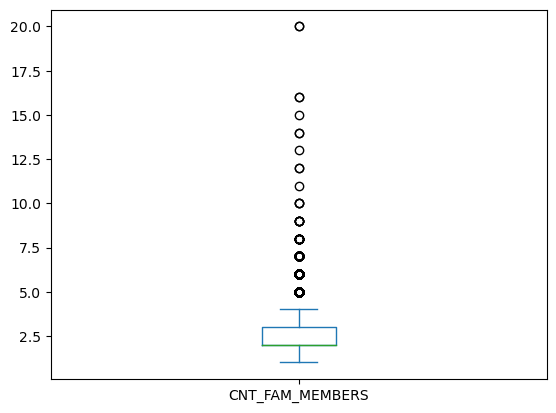

In [164]:
application_data['CNT_FAM_MEMBERS'].plot.box()
plt.show()

In [29]:
((application_data.isnull().sum()/len(application_data.index))*100).head(60)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.000000
AMT_GOODS_PRICE                  0.000000
NAME_TYPE_SUITE                  0.000000
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [39]:
## Treating column(EXT_SOURCE_2)

In [40]:
application_data['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [41]:
application_data['EXT_SOURCE_2'].value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

In [42]:
application_data['EXT_SOURCE_2'].isnull().sum()

660

In [43]:
application_data['EXT_SOURCE_2'].head()

0    0.262949
1    0.622246
2    0.555912
3    0.650442
4    0.322738
Name: EXT_SOURCE_2, dtype: float64

In [30]:
application_data['EXT_SOURCE_2'] = application_data['EXT_SOURCE_2'].fillna(application_data['EXT_SOURCE_2'].median())

In [45]:
application_data['EXT_SOURCE_2'].isnull().sum()

0

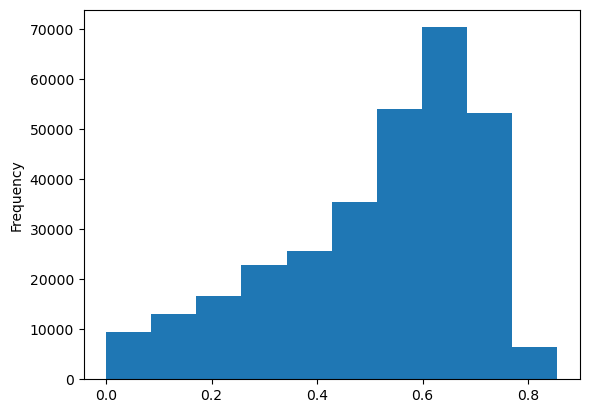

In [47]:
application_data['EXT_SOURCE_2'].plot.hist()
plt.show()

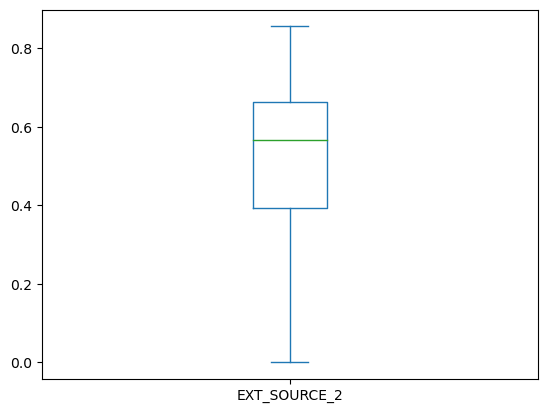

In [49]:
application_data['EXT_SOURCE_2'].plot.box().figsize=[8,10]
plt.show()

In [166]:
application_data.isnull().sum().head(60)

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                      0
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [52]:
## Treating column(EXT_SOURCE_3)

In [53]:
application_data['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [55]:
application_data['EXT_SOURCE_3'].value_counts().head(10)

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
0.581484    1141
0.689479    1138
0.595456    1136
0.554947    1132
0.621226    1109
Name: EXT_SOURCE_3, dtype: int64

In [167]:
application_data['EXT_SOURCE_3'].isnull().sum()

60965

In [57]:
application_data['EXT_SOURCE_3'].head()

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
Name: EXT_SOURCE_3, dtype: float64

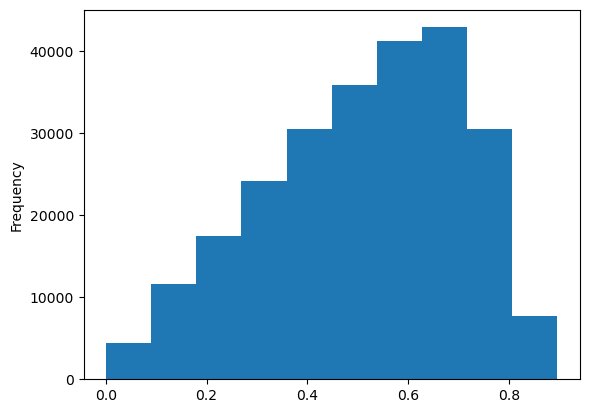

In [58]:
application_data['EXT_SOURCE_3'].plot.hist()
plt.show()

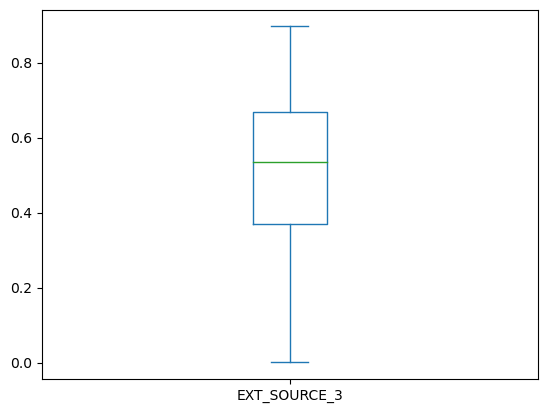

In [61]:
application_data['EXT_SOURCE_3'].plot.box().figsize=[8,10]
plt.show()

In [31]:
application_data['EXT_SOURCE_3'] = application_data['EXT_SOURCE_3'].fillna(application_data['EXT_SOURCE_3'].median())

In [169]:
application_data['EXT_SOURCE_3'].isnull().sum()

0

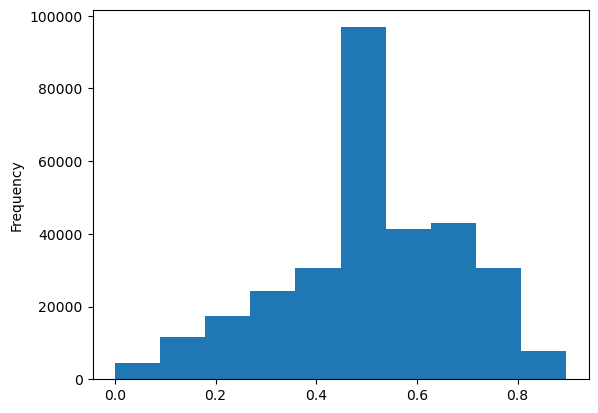

In [70]:
application_data['EXT_SOURCE_3'].plot.hist()
plt.show()

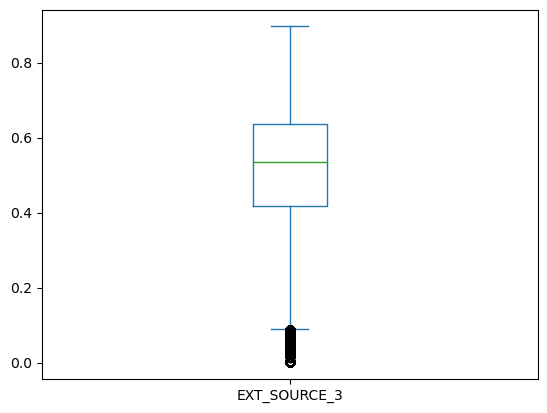

In [73]:
application_data['EXT_SOURCE_3'].plot.box()
plt.show()

In [170]:
application_data.isnull().sum().head(60)

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                      0
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [ ]:
## Treating column(YEARS_BEGINEXPLUATATION_AVG)

In [76]:
application_data['YEARS_BEGINEXPLUATATION_AVG'].describe()

count    157504.000000
mean          0.977735
std           0.059223
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

In [77]:
application_data['YEARS_BEGINEXPLUATATION_AVG'].value_counts()

0.9871    4311
0.9856    4189
0.9861    4171
0.9801    4123
0.9866    4114
          ... 
0.8992       1
0.8276       1
0.3279       1
0.6577       1
0.8629       1
Name: YEARS_BEGINEXPLUATATION_AVG, Length: 285, dtype: int64

In [78]:
application_data['YEARS_BEGINEXPLUATATION_AVG'].head()

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

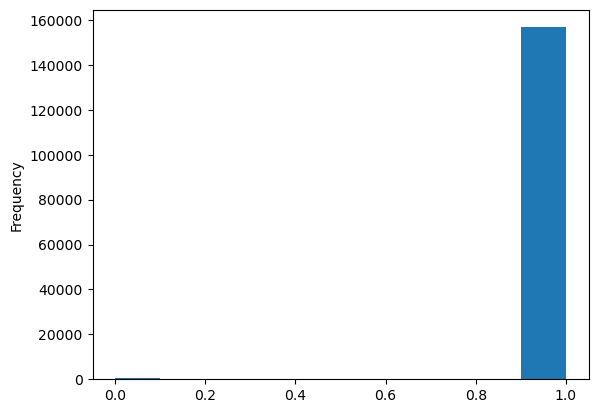

In [80]:
application_data['YEARS_BEGINEXPLUATATION_AVG'].plot.hist()
plt.show()

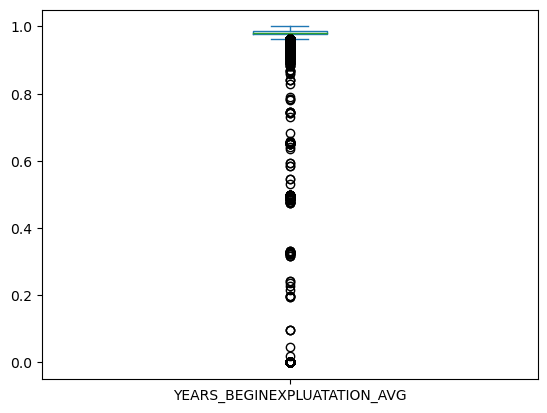

In [82]:
application_data['YEARS_BEGINEXPLUATATION_AVG'].plot.box()
plt.show()

In [32]:
application_data['YEARS_BEGINEXPLUATATION_AVG'] = application_data['YEARS_BEGINEXPLUATATION_AVG'].fillna(application_data['YEARS_BEGINEXPLUATATION_AVG'].median())

In [172]:
application_data['YEARS_BEGINEXPLUATATION_AVG'].isnull().sum()

0

In [85]:
application_data['YEARS_BEGINEXPLUATATION_AVG'].describe()

count    307511.000000
mean          0.979620
std           0.042429
min           0.000000
25%           0.981600
50%           0.981600
75%           0.982100
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

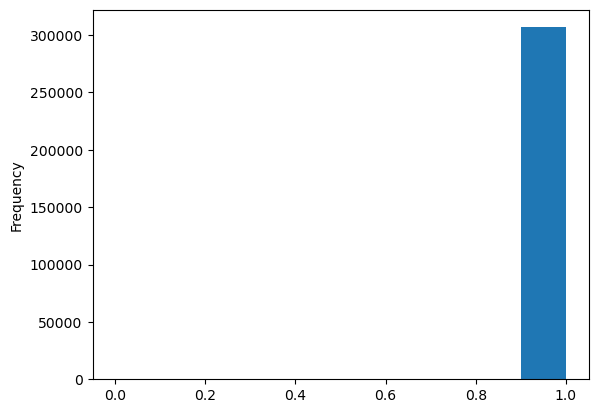

In [86]:
application_data['YEARS_BEGINEXPLUATATION_AVG'].plot.hist()
plt.show()

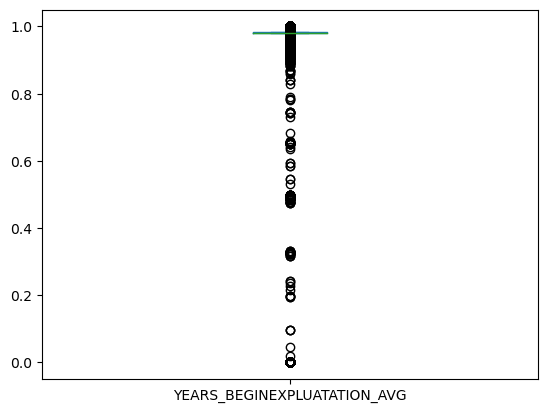

In [173]:
application_data['YEARS_BEGINEXPLUATATION_AVG'].plot.box()
plt.show()

In [33]:
application_data.isnull().sum().head(60)

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                      0
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [92]:
## Treating column(FLOORSMAX_AVG)

In [93]:
application_data['FLOORSMAX_AVG'].describe()
                                           

count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64

In [95]:
application_data['FLOORSMAX_AVG'].value_counts().head(10)

0.1667    61875
0.3333    31909
0.0417    14600
0.3750     7926
0.1250     6974
0.0833     6586
0.0000     2938
0.4583     2828
0.6250     1915
0.5417     1685
Name: FLOORSMAX_AVG, dtype: int64

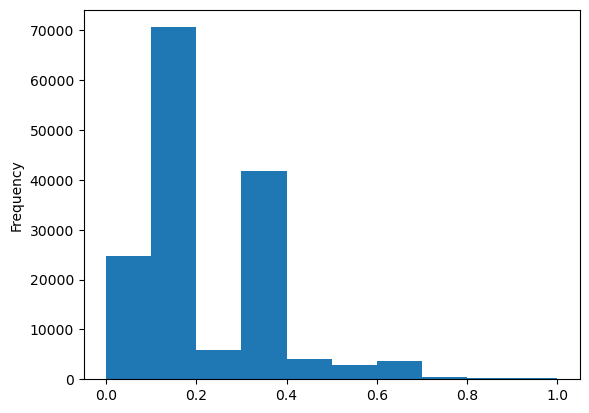

In [97]:
application_data['FLOORSMAX_AVG'].plot.hist()
plt.show()

In [34]:
application_data['FLOORSMAX_AVG'] = application_data['FLOORSMAX_AVG'].fillna(application_data['FLOORSMAX_AVG'].median())

In [176]:
application_data['FLOORSMAX_AVG'].isnull().sum()

0

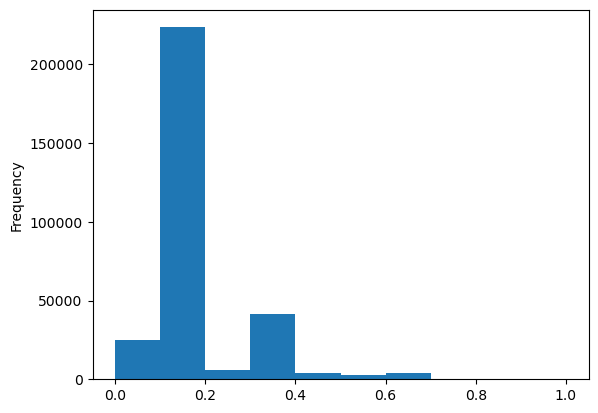

In [101]:
application_data['FLOORSMAX_AVG'].plot.hist()
plt.show()

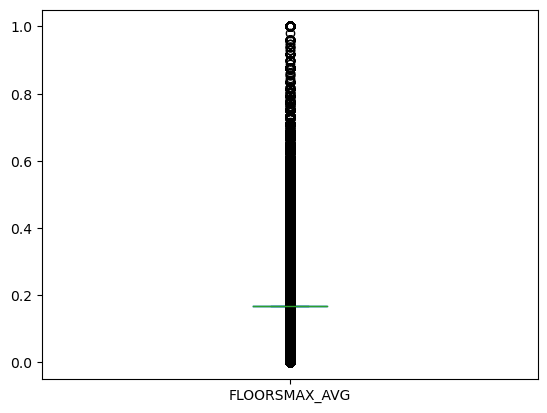

In [103]:
application_data['FLOORSMAX_AVG'].plot.box()
plt.show()

In [35]:
application_data.isnull().sum().head(60)                        

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                      0
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [110]:
## Treating column(YEARS_BEGINEXPLUATATION_MODE)

In [111]:
application_data['YEARS_BEGINEXPLUATATION_MODE'].describe()

count    157504.000000
mean          0.977065
std           0.064575
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

In [178]:
application_data['YEARS_BEGINEXPLUATATION_MODE'].value_counts().head(10)

0.9871    4291
0.9866    4173
0.9861    4167
0.9801    4110
0.9806    4083
0.9856    4075
0.9851    4016
0.9816    3976
0.9796    3974
0.9791    3935
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: int64

In [115]:
application_data['YEARS_BEGINEXPLUATATION_MODE'].head()

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

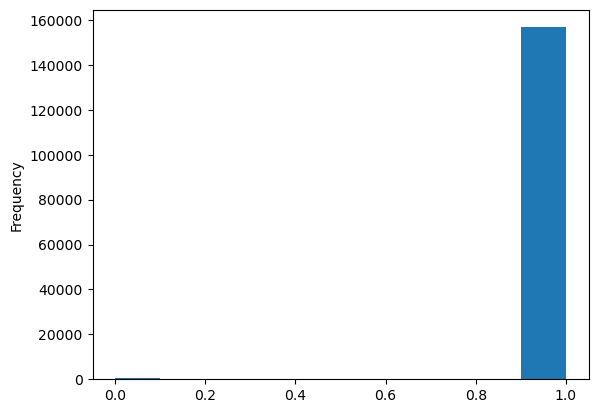

In [116]:
application_data['YEARS_BEGINEXPLUATATION_MODE'].plot.hist()
plt.show()

In [36]:
application_data['YEARS_BEGINEXPLUATATION_MODE'] = application_data['YEARS_BEGINEXPLUATATION_MODE'].fillna(application_data['YEARS_BEGINEXPLUATATION_MODE'].median())

In [180]:
application_data['YEARS_BEGINEXPLUATATION_MODE'].isnull().sum()

0

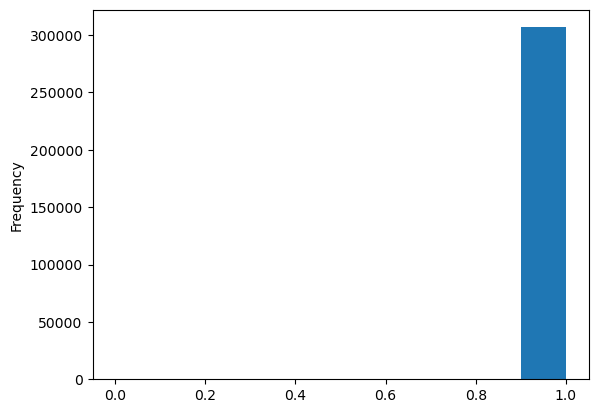

In [119]:
application_data['YEARS_BEGINEXPLUATATION_MODE'].plot.hist()
plt.show()

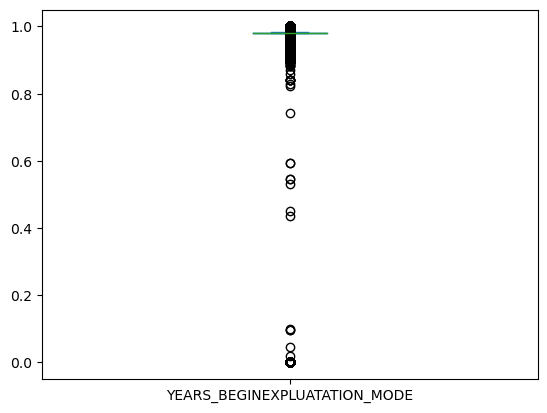

In [120]:
application_data['YEARS_BEGINEXPLUATATION_MODE'].plot.box()
plt.show()

In [37]:
application_data.isnull().sum().head(60)

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                      0
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [122]:
## Treating column(FLOORSMAX_MODE)

In [123]:
application_data['FLOORSMAX_MODE'].describe()

count    154491.000000
mean          0.222315
std           0.143709
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MODE, dtype: float64

In [124]:
application_data['FLOORSMAX_MODE'].value_counts()

0.1667    65550
0.3333    34373
0.0417    15616
0.3750     8321
0.1250     7267
0.0833     6785
0.0000     3415
0.4583     3216
0.6250     2075
0.5417     1836
0.6667     1710
0.2083     1505
0.2500      572
0.2917      511
0.5833      391
0.4167      236
0.8750      229
0.7083      199
0.5000      184
1.0000      164
0.7500      124
0.9583       94
0.7917       58
0.9167       38
0.8333       22
Name: FLOORSMAX_MODE, dtype: int64

In [125]:
application_data['FLOORSMAX_MODE'].isnull().sum()

153020

In [38]:
application_data['FLOORSMAX_MODE'] = application_data['FLOORSMAX_MODE'].fillna(application_data['FLOORSMAX_MODE'].median())

In [183]:
application_data['FLOORSMAX_MODE'].isnull().sum()

0

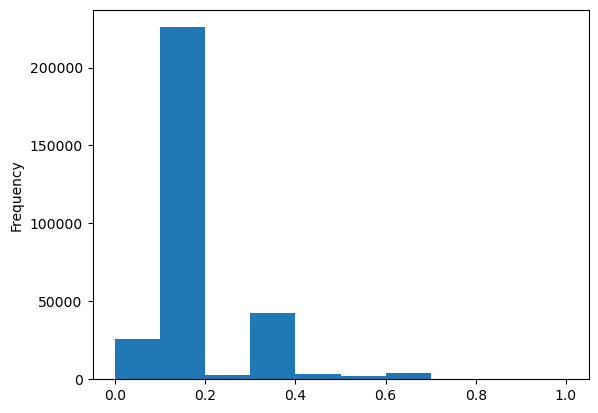

In [128]:
application_data['FLOORSMAX_MODE'].plot.hist()
plt.show()

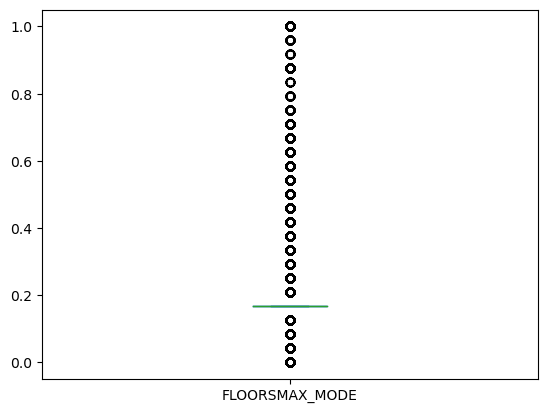

In [129]:
application_data['FLOORSMAX_MODE'].plot.box()
plt.show()

In [39]:
application_data.isnull().sum().head(60)

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                      0
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [132]:
## Treating column(YEARS_BEGINEXPLUATATION_MEDI)

In [133]:
application_data['YEARS_BEGINEXPLUATATION_MEDI'].describe()

count    157504.000000
mean          0.977752
std           0.059897
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

In [135]:
application_data['YEARS_BEGINEXPLUATATION_MEDI'].value_counts().head()

0.9871    4314
0.9861    4247
0.9856    4199
0.9866    4138
0.9801    4115
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: int64

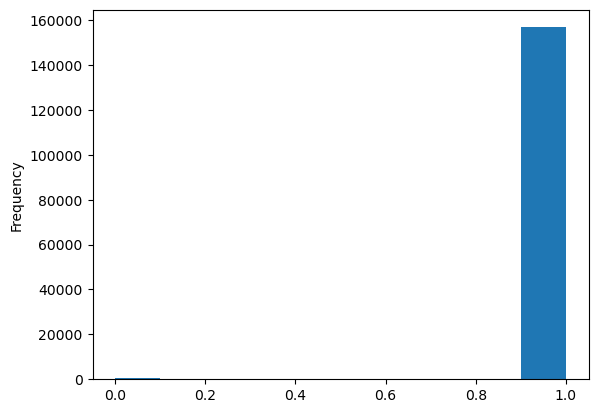

In [136]:
application_data['YEARS_BEGINEXPLUATATION_MEDI'].plot.hist()
plt.show()

In [40]:
application_data['YEARS_BEGINEXPLUATATION_MEDI'] = application_data['YEARS_BEGINEXPLUATATION_MEDI'].fillna(application_data['YEARS_BEGINEXPLUATATION_MEDI'].median())

In [186]:
application_data['YEARS_BEGINEXPLUATATION_MEDI'].isnull().sum()

0

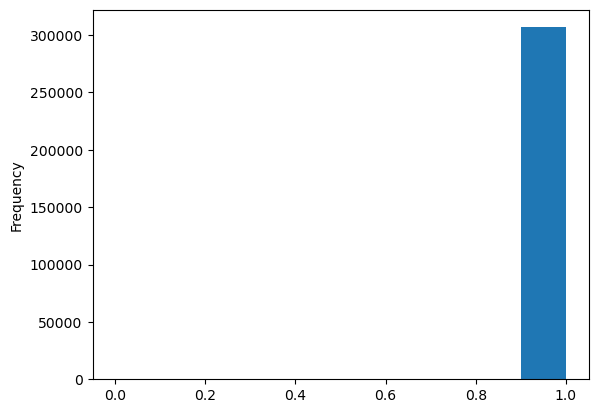

In [139]:
application_data['YEARS_BEGINEXPLUATATION_MEDI'].plot.hist()
plt.show()

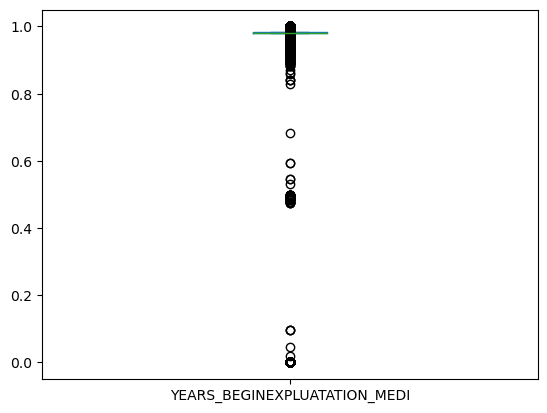

In [188]:
application_data['YEARS_BEGINEXPLUATATION_MEDI'].plot.box()
plt.show()

In [41]:
application_data.isnull().sum().head(60)

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                      0
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [189]:
## Treating column(FLOORSMAX_MEDI)

In [190]:
application_data['FLOORSMAX_MEDI'].describe()

count    154491.000000
mean          0.225897
std           0.145067
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MEDI, dtype: float64

In [191]:
application_data['FLOORSMAX_MEDI'].value_counts()

0.1667    63607
0.3333    33279
0.0417    14832
0.3750     8207
0.1250     7079
0.0833     6657
0.4583     3089
0.0000     2995
0.6250     2042
0.5417     1860
0.2500     1684
0.6667     1675
0.2083     1544
0.2917      567
0.1042      460
0.3542      459
0.5833      439
0.3958      346
0.4167      329
0.1458      321
0.5000      312
0.2708      291
0.1875      245
0.8750      223
0.4792      220
0.7083      204
1.0000      170
0.4375      138
0.7500      136
0.0625      132
0.3125      131
0.2292      128
0.0208      126
0.6042      115
0.9583       95
0.7917       61
0.5208       47
0.5625       46
0.8333       39
0.9167       37
0.6458       30
0.7708       27
0.6875       24
0.8125       23
0.7292       10
0.9375        4
0.8542        3
0.8958        2
0.9792        1
Name: FLOORSMAX_MEDI, dtype: int64

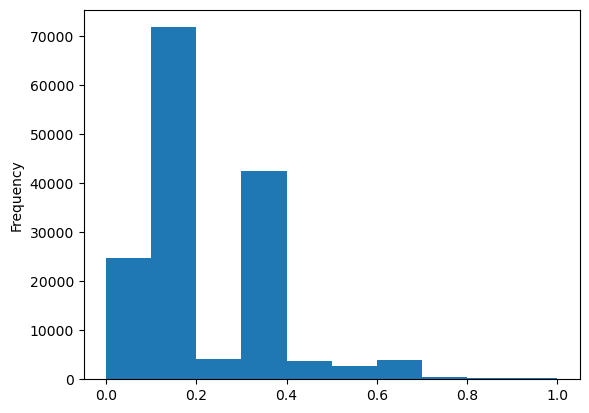

In [192]:
application_data['FLOORSMAX_MEDI'].plot.hist()
plt.show()

In [194]:
application_data['FLOORSMAX_MEDI'].head(10)

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: FLOORSMAX_MEDI, dtype: float64

In [42]:
application_data['FLOORSMAX_MEDI'] = application_data['FLOORSMAX_MEDI'].fillna(application_data['FLOORSMAX_MEDI'].median())

In [196]:
application_data['FLOORSMAX_MEDI'].isnull().sum()

0

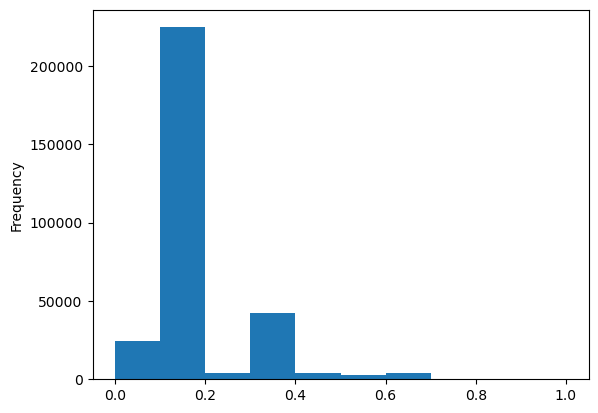

In [197]:
application_data['FLOORSMAX_MEDI'].plot.hist()
plt.show()

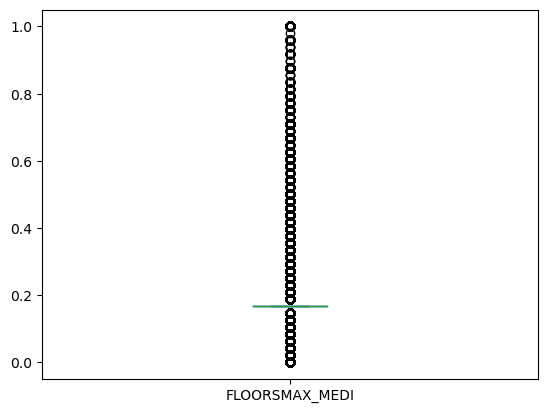

In [198]:
application_data['FLOORSMAX_MEDI'].plot.box()
plt.show()

In [199]:
application_data['FLOORSMAX_MEDI'].isnull().sum()

0

In [43]:
application_data.isnull().sum().head(60)

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                      0
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [203]:
## Treating column(TOTALAREA_MODE)

In [204]:
application_data['TOTALAREA_MODE'].describe()

count    159080.000000
mean          0.102547
std           0.107462
min           0.000000
25%           0.041200
50%           0.068800
75%           0.127600
max           1.000000
Name: TOTALAREA_MODE, dtype: float64

In [209]:
application_data['TOTALAREA_MODE'].value_counts().head()

0.0000    582
0.0570    247
0.0547    230
0.0550    227
0.0555    227
Name: TOTALAREA_MODE, dtype: int64

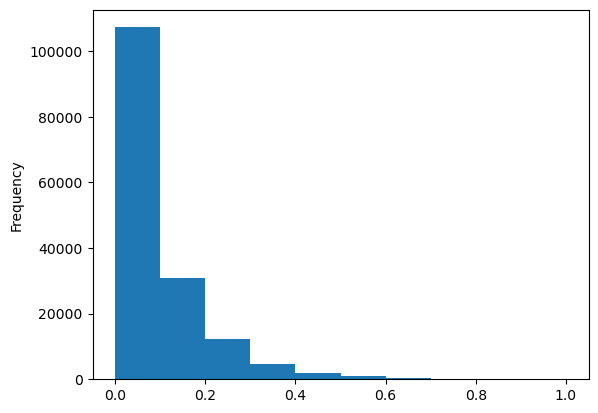

In [210]:
application_data['TOTALAREA_MODE'].plot.hist()
plt.show()

In [44]:
application_data['TOTALAREA_MODE'] = application_data['TOTALAREA_MODE'].fillna(application_data['TOTALAREA_MODE'].median())

In [213]:
application_data['TOTALAREA_MODE'].isnull().sum()

0

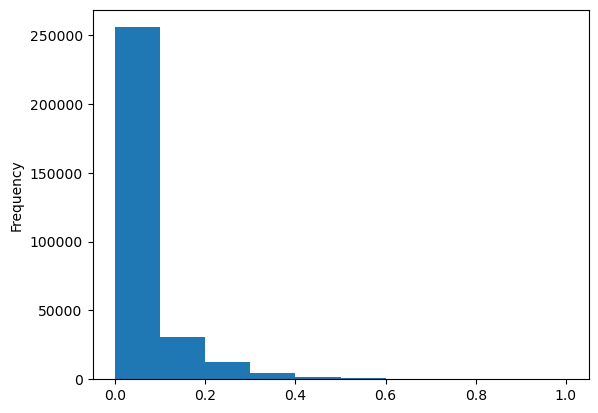

In [214]:
application_data['TOTALAREA_MODE'].plot.hist()
plt.show()

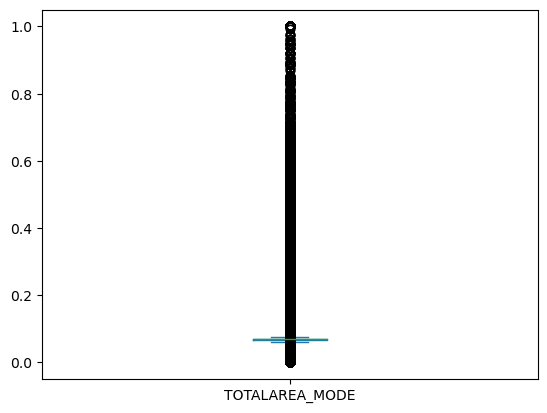

In [217]:
application_data['TOTALAREA_MODE'].plot.box()
plt.show()

In [45]:
application_data.isnull().sum().head(60)

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                      0
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [220]:
## Treating column (EMERGENCYSTATE_MODE)

In [221]:
application_data['EMERGENCYSTATE_MODE'].describe()

count     161756
unique         2
top           No
freq      159428
Name: EMERGENCYSTATE_MODE, dtype: object

In [222]:
application_data['EMERGENCYSTATE_MODE'].value_counts()

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

In [226]:
application_data['EMERGENCYSTATE_MODE'].head()

0      No
1      No
2     NaN
3     NaN
4     NaN
     ... 
65     No
66    NaN
67    NaN
68     No
69     No
Name: EMERGENCYSTATE_MODE, Length: 70, dtype: object

In [46]:
application_data['EMERGENCYSTATE_MODE'] = application_data['EMERGENCYSTATE_MODE'].fillna('No')

In [229]:
application_data['EMERGENCYSTATE_MODE'].isnull().sum()

0

In [230]:
application_data['EMERGENCYSTATE_MODE'].value_counts()

No     305183
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

In [231]:
application_data['EMERGENCYSTATE_MODE'].head()

0    No
1    No
2    No
3    No
4    No
Name: EMERGENCYSTATE_MODE, dtype: object

In [47]:
application_data.isnull().sum().head(60)

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [234]:
## Treating column(OBS_30_CNT_SOCIAL_CIRCLE)

In [235]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [237]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [238]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

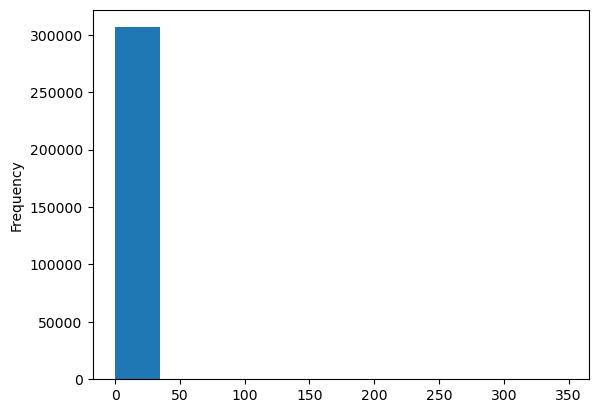

In [240]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].plot.hist()
plt.show()

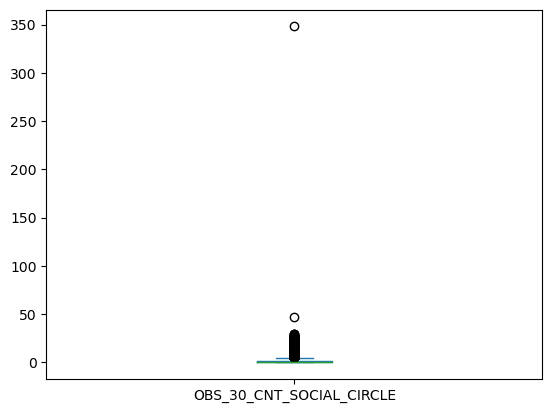

In [241]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].plot.box()
plt.show()

In [242]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].head()

0    2.0
1    1.0
2    0.0
3    2.0
4    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [243]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].mean()

1.4222454239942575

In [244]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].median()

0.0

In [48]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'] = application_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(application_data['OBS_30_CNT_SOCIAL_CIRCLE'].mean())

In [246]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [248]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].head(20)

0     2.0
1     1.0
2     0.0
3     2.0
4     0.0
5     0.0
6     1.0
7     2.0
8     1.0
9     2.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    4.0
18    8.0
19    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

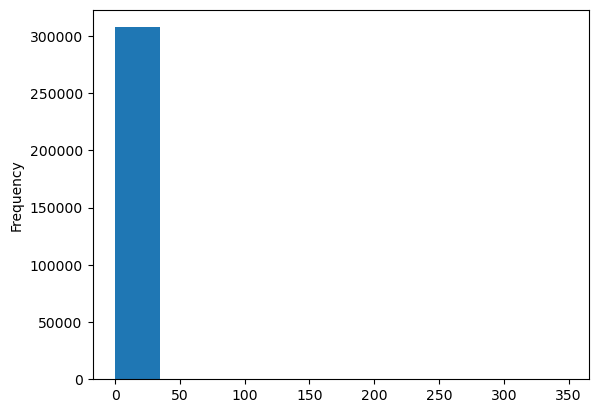

In [249]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].plot.hist()
plt.show()

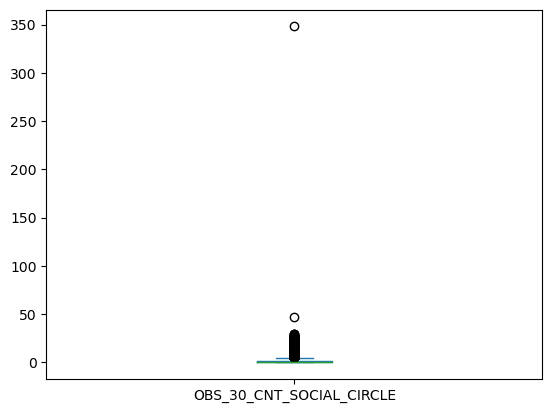

In [250]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].plot.box()
plt.show()

In [251]:
# In above boxplot clearly shows that there is an outlier.

In [49]:
application_data.isnull().sum().head(60)

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [254]:
## Treating column(DEF_30_CNT_SOCIAL_CIRCLE)

In [255]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [256]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [257]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [258]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].head()

0    2.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

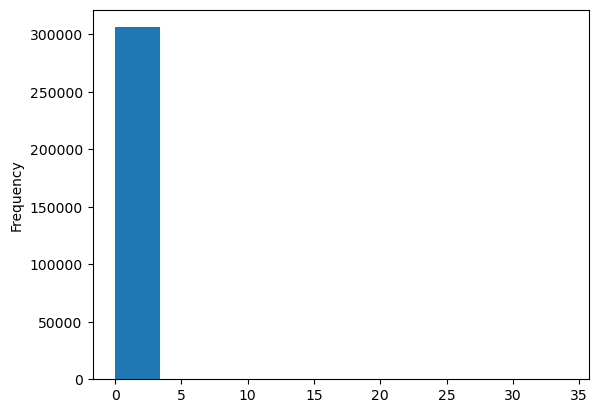

In [259]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].plot.hist()
plt.show()

In [260]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].median()

0.0

In [261]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].mean()

0.1434206662533851

In [50]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'] = application_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(application_data['DEF_30_CNT_SOCIAL_CIRCLE'].mean())

In [263]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()
                                                         

0

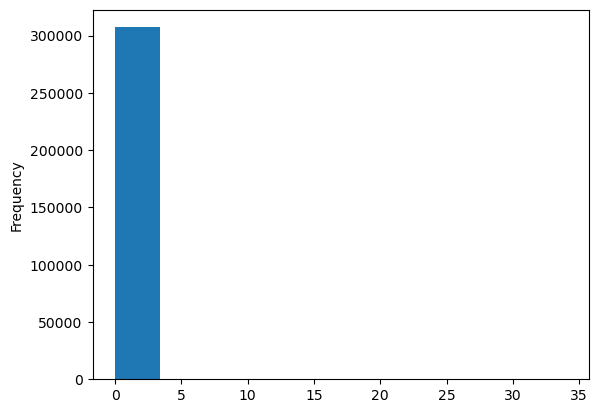

In [264]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].plot.hist()
plt.show()

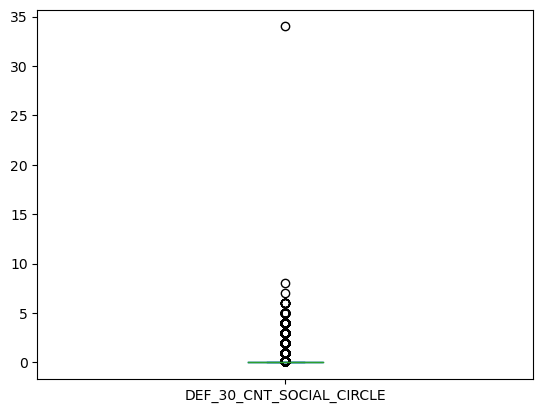

In [265]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].plot.box()
plt.show()

In [266]:
# In above boxplot clearly shows that there is an outlier.

In [51]:
application_data.isnull().sum().head(60)

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [270]:
## Treating column(OBS_60_CNT_SOCIAL_CIRCLE)

In [271]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [272]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
47.0          1
344.0         1
30.0          1
26.0          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [273]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].head(20)

0     2.0
1     1.0
2     0.0
3     2.0
4     0.0
5     0.0
6     1.0
7     2.0
8     1.0
9     2.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    4.0
18    8.0
19    0.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

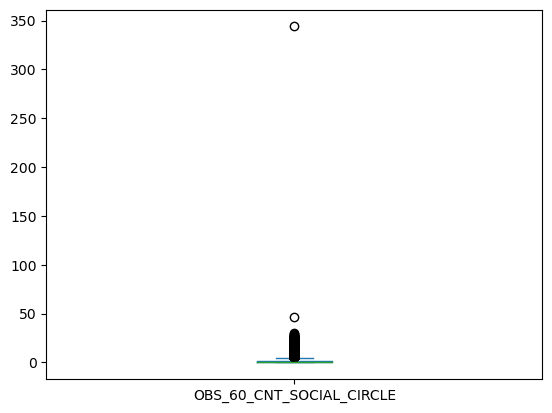

In [274]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].plot.box()
plt.show()

In [52]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'] = application_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(application_data['OBS_60_CNT_SOCIAL_CIRCLE'].mean())

In [276]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

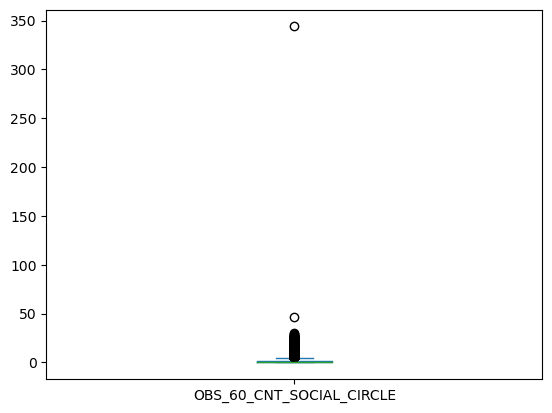

In [277]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].plot.box()
plt.show()

In [278]:
# In above boxplot clearly shows that there is an outlier.

In [53]:
application_data.isnull().sum().head(60)

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [281]:
## Treating column(DEF_60_CNT_SOCIAL_CIRCLE)

In [282]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [283]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.0     280721
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

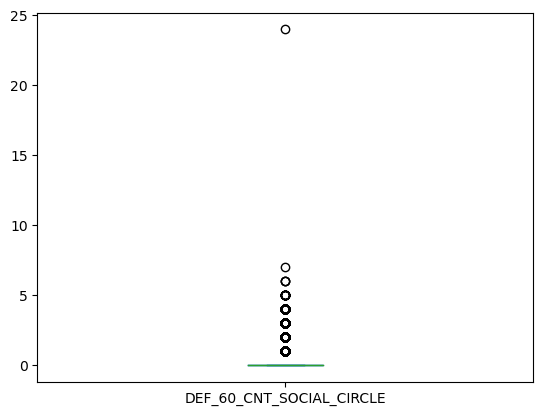

In [284]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].plot.box()
plt.show()

In [54]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'] = application_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(application_data['DEF_60_CNT_SOCIAL_CIRCLE'].mean())

In [286]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

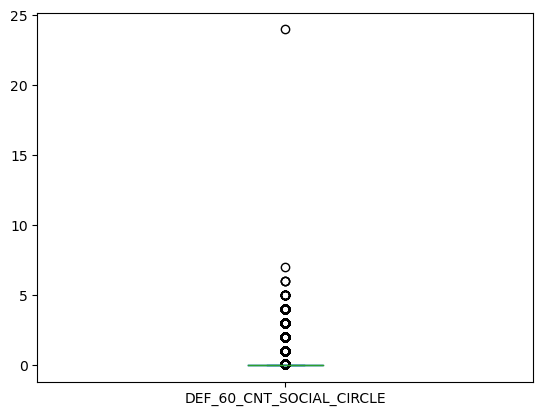

In [288]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].plot.box()
plt.show()

In [289]:
# In above boxplot clearly shows that there is an outlier.

In [55]:
application_data.isnull().sum().head(60)

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_

In [292]:
## Treating column(DAYS_LAST_PHONE_CHANGE)

In [293]:
application_data['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [294]:
application_data['DAYS_LAST_PHONE_CHANGE'].isnull().sum()
                                                       

1

In [295]:
application_data['DAYS_LAST_PHONE_CHANGE'].head(20)

0    -1134.0
1     -828.0
2     -815.0
3     -617.0
4    -1106.0
5    -2536.0
6    -1562.0
7    -1070.0
8        0.0
9    -1673.0
10    -844.0
11   -2396.0
12   -2370.0
13      -4.0
14    -188.0
15    -925.0
16      -3.0
17   -2811.0
18    -239.0
19   -1850.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [297]:
application_data['DAYS_LAST_PHONE_CHANGE'].value_counts().head(20)

 0.0      37672
-1.0       2812
-2.0       2318
-3.0       1763
-4.0       1285
-5.0        824
-6.0        537
-7.0        442
-8.0        278
-476.0      222
-352.0      213
-392.0      211
-364.0      209
-479.0      204
-358.0      203
-329.0      203
-293.0      202
-350.0      201
-441.0      200
-399.0      200
Name: DAYS_LAST_PHONE_CHANGE, dtype: int64

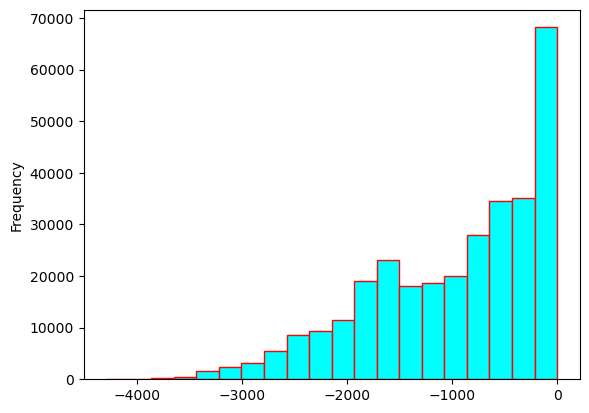

In [305]:
application_data['DAYS_LAST_PHONE_CHANGE'].plot.hist(bins=20,edgecolor='red',color='cyan')
plt.show()

In [56]:
application_data['DAYS_LAST_PHONE_CHANGE'] = application_data['DAYS_LAST_PHONE_CHANGE'].fillna(application_data['DAYS_LAST_PHONE_CHANGE'].median())

In [307]:
application_data['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

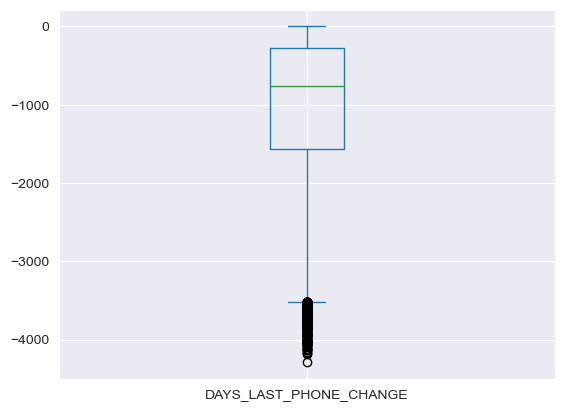

In [312]:
application_data['DAYS_LAST_PHONE_CHANGE'].plot.box()
sns.set_style('ticks')

In [57]:
application_data.isnull().sum().sort_values(ascending=False).head(60)

AMT_REQ_CREDIT_BUREAU_YEAR      41519
AMT_REQ_CREDIT_BUREAU_QRT       41519
AMT_REQ_CREDIT_BUREAU_MON       41519
AMT_REQ_CREDIT_BUREAU_WEEK      41519
AMT_REQ_CREDIT_BUREAU_DAY       41519
AMT_REQ_CREDIT_BUREAU_HOUR      41519
OBS_30_CNT_SOCIAL_CIRCLE            0
FLAG_DOCUMENT_3                     0
FLAG_DOCUMENT_2                     0
DAYS_LAST_PHONE_CHANGE              0
DEF_60_CNT_SOCIAL_CIRCLE            0
OBS_60_CNT_SOCIAL_CIRCLE            0
DEF_30_CNT_SOCIAL_CIRCLE            0
FLOORSMAX_MEDI                      0
EMERGENCYSTATE_MODE                 0
TOTALAREA_MODE                      0
FLAG_DOCUMENT_5                     0
YEARS_BEGINEXPLUATATION_MEDI        0
FLOORSMAX_MODE                      0
YEARS_BEGINEXPLUATATION_MODE        0
FLOORSMAX_AVG                       0
FLAG_DOCUMENT_4                     0
FLAG_DOCUMENT_8                     0
FLAG_DOCUMENT_6                     0
FLAG_DOCUMENT_15                    0
FLAG_DOCUMENT_21                    0
FLAG_DOCUMEN

In [324]:
## Treating column(AMT_REQ_CREDIT_BUREAU_HOUR)

In [323]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

41519

In [326]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].head(20)

0     0.0
1     0.0
2     0.0
3     NaN
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     NaN
10    0.0
11    0.0
12    0.0
13    0.0
14    NaN
15    0.0
16    0.0
17    NaN
18    0.0
19    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [327]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [328]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

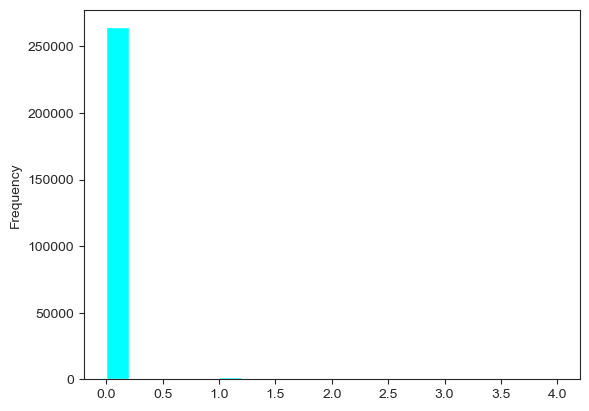

In [332]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].plot.hist(bins=20,color='cyan')
plt.show()

In [58]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'] = application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].median())

In [334]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

0

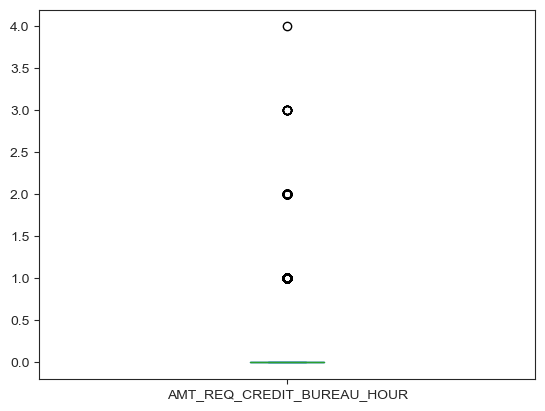

In [335]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].plot.box()
plt.show()

In [59]:
application_data.isnull().sum().sort_values(ascending=False).head(60)

AMT_REQ_CREDIT_BUREAU_YEAR      41519
AMT_REQ_CREDIT_BUREAU_QRT       41519
AMT_REQ_CREDIT_BUREAU_MON       41519
AMT_REQ_CREDIT_BUREAU_WEEK      41519
AMT_REQ_CREDIT_BUREAU_DAY       41519
OBS_30_CNT_SOCIAL_CIRCLE            0
FLAG_DOCUMENT_4                     0
FLAG_DOCUMENT_3                     0
FLAG_DOCUMENT_2                     0
DAYS_LAST_PHONE_CHANGE              0
DEF_60_CNT_SOCIAL_CIRCLE            0
OBS_60_CNT_SOCIAL_CIRCLE            0
DEF_30_CNT_SOCIAL_CIRCLE            0
TOTALAREA_MODE                      0
EMERGENCYSTATE_MODE                 0
FLAG_DOCUMENT_6                     0
FLOORSMAX_MEDI                      0
YEARS_BEGINEXPLUATATION_MEDI        0
FLOORSMAX_MODE                      0
YEARS_BEGINEXPLUATATION_MODE        0
FLOORSMAX_AVG                       0
FLAG_DOCUMENT_5                     0
FLAG_DOCUMENT_8                     0
FLAG_DOCUMENT_7                     0
FLAG_DOCUMENT_16                    0
AMT_REQ_CREDIT_BUREAU_HOUR          0
FLAG_DOCUMEN

In [337]:
## Treating column(AMT_REQ_CREDIT_BUREAU_YEAR)

In [338]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [339]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].head()

0    1.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

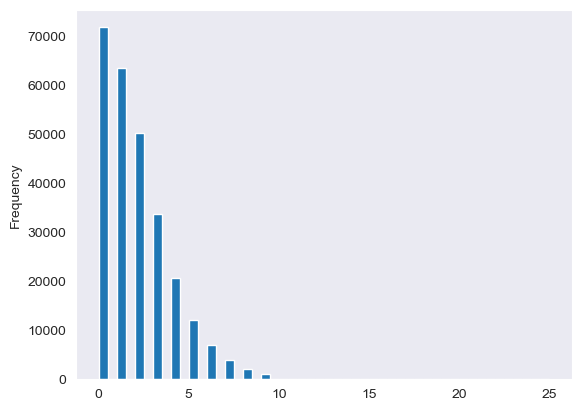

In [347]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].plot.hist(bins=50)
sns.set_style('darkgrid')

In [345]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [60]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'] = application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].median())

In [349]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

0

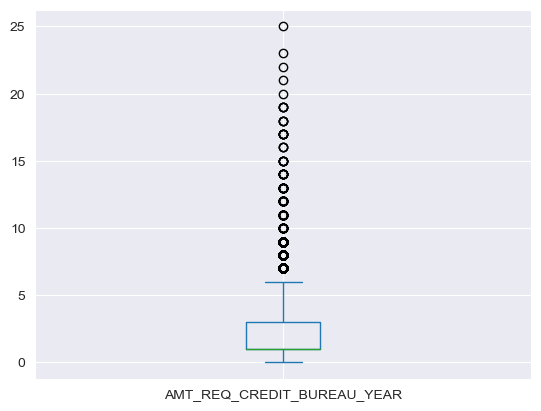

In [350]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].plot.box()
plt.show()

In [61]:
application_data.isnull().sum().sort_values(ascending=False).head(60)

AMT_REQ_CREDIT_BUREAU_QRT       41519
AMT_REQ_CREDIT_BUREAU_MON       41519
AMT_REQ_CREDIT_BUREAU_WEEK      41519
AMT_REQ_CREDIT_BUREAU_DAY       41519
SK_ID_CURR                          0
OBS_30_CNT_SOCIAL_CIRCLE            0
FLAG_DOCUMENT_4                     0
FLAG_DOCUMENT_3                     0
FLAG_DOCUMENT_2                     0
DAYS_LAST_PHONE_CHANGE              0
DEF_60_CNT_SOCIAL_CIRCLE            0
OBS_60_CNT_SOCIAL_CIRCLE            0
DEF_30_CNT_SOCIAL_CIRCLE            0
TOTALAREA_MODE                      0
EMERGENCYSTATE_MODE                 0
FLAG_DOCUMENT_6                     0
FLOORSMAX_MEDI                      0
YEARS_BEGINEXPLUATATION_MEDI        0
FLOORSMAX_MODE                      0
YEARS_BEGINEXPLUATATION_MODE        0
FLOORSMAX_AVG                       0
FLAG_DOCUMENT_5                     0
FLAG_DOCUMENT_8                     0
FLAG_DOCUMENT_7                     0
FLAG_DOCUMENT_16                    0
AMT_REQ_CREDIT_BUREAU_HOUR          0
FLAG_DOCUMEN

In [352]:
##Treating column(AMT_REQ_CREDIT_BUREAU_QRT)

In [354]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [355]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [62]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'] = application_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_QRT'].mean())

In [357]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

0

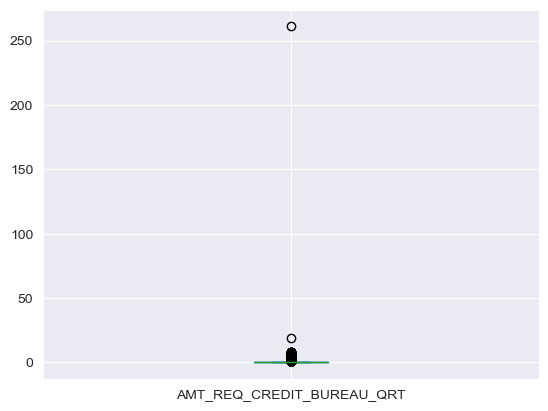

In [360]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].plot.box()
plt.show()

In [361]:
## Clearly shown outlier in above figure.

In [63]:
application_data.isnull().sum().sort_values(ascending=False).head(60)

AMT_REQ_CREDIT_BUREAU_MON       41519
AMT_REQ_CREDIT_BUREAU_WEEK      41519
AMT_REQ_CREDIT_BUREAU_DAY       41519
SK_ID_CURR                          0
OBS_30_CNT_SOCIAL_CIRCLE            0
FLAG_DOCUMENT_4                     0
FLAG_DOCUMENT_3                     0
FLAG_DOCUMENT_2                     0
DAYS_LAST_PHONE_CHANGE              0
DEF_60_CNT_SOCIAL_CIRCLE            0
OBS_60_CNT_SOCIAL_CIRCLE            0
DEF_30_CNT_SOCIAL_CIRCLE            0
TOTALAREA_MODE                      0
EMERGENCYSTATE_MODE                 0
FLAG_DOCUMENT_6                     0
FLOORSMAX_MEDI                      0
YEARS_BEGINEXPLUATATION_MEDI        0
FLOORSMAX_MODE                      0
YEARS_BEGINEXPLUATATION_MODE        0
FLOORSMAX_AVG                       0
FLAG_DOCUMENT_5                     0
FLAG_DOCUMENT_8                     0
FLAG_DOCUMENT_7                     0
EXT_SOURCE_3                        0
AMT_REQ_CREDIT_BUREAU_QRT           0
AMT_REQ_CREDIT_BUREAU_HOUR          0
FLAG_DOCUMEN

In [363]:
## Treating column(AMT_REQ_CREDIT_BUREAU_MON)

In [364]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [365]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()
                                                        

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

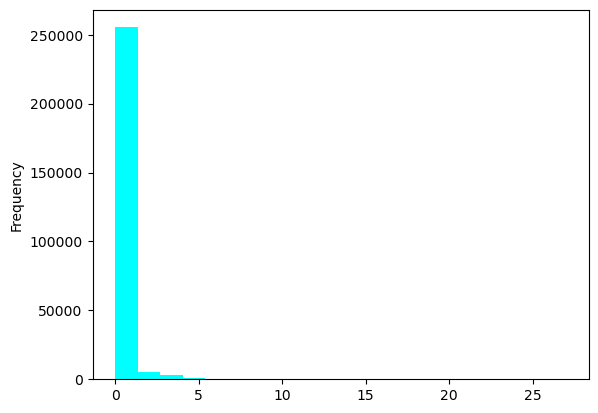

In [371]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].plot.hist(bins=20,color='cyan')
plt.style.use('default')

In [64]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'] = application_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_MON'].median())

In [373]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

0

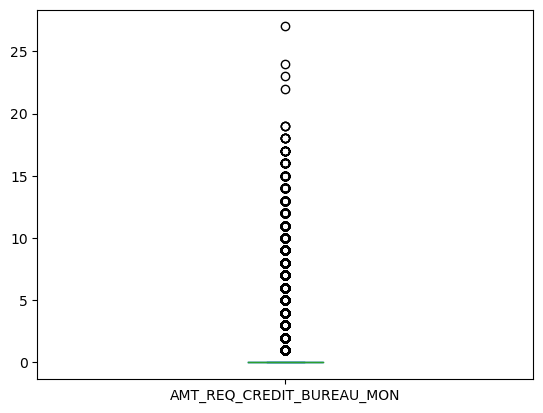

In [374]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].plot.box()
plt.show()

In [65]:
application_data.isnull().sum().sort_values(ascending=False).head(60)

AMT_REQ_CREDIT_BUREAU_WEEK      41519
AMT_REQ_CREDIT_BUREAU_DAY       41519
SK_ID_CURR                          0
DEF_30_CNT_SOCIAL_CIRCLE            0
FLAG_DOCUMENT_5                     0
FLAG_DOCUMENT_4                     0
FLAG_DOCUMENT_3                     0
FLAG_DOCUMENT_2                     0
DAYS_LAST_PHONE_CHANGE              0
DEF_60_CNT_SOCIAL_CIRCLE            0
OBS_60_CNT_SOCIAL_CIRCLE            0
EMERGENCYSTATE_MODE                 0
OBS_30_CNT_SOCIAL_CIRCLE            0
FLAG_DOCUMENT_7                     0
TOTALAREA_MODE                      0
FLOORSMAX_MEDI                      0
YEARS_BEGINEXPLUATATION_MEDI        0
FLOORSMAX_MODE                      0
YEARS_BEGINEXPLUATATION_MODE        0
FLOORSMAX_AVG                       0
FLAG_DOCUMENT_6                     0
FLAG_DOCUMENT_8                     0
EXT_SOURCE_3                        0
FLAG_DOCUMENT_9                     0
AMT_REQ_CREDIT_BUREAU_QRT           0
AMT_REQ_CREDIT_BUREAU_MON           0
AMT_REQ_CRED

In [376]:
## Treating column(AMT_REQ_CREDIT_BUREAU_WEEK)

In [377]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [378]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

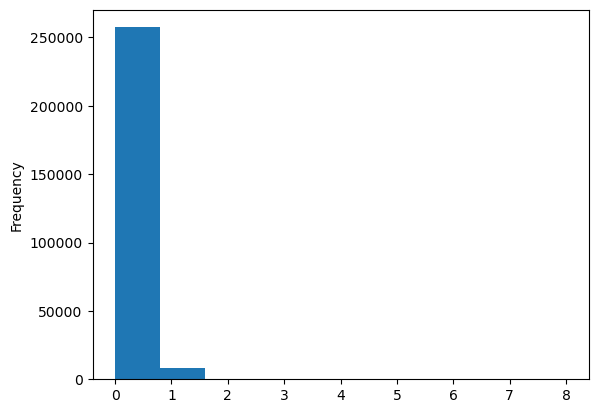

In [380]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].plot.hist()
plt.show()

In [66]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'] = application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].median())

In [382]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

0

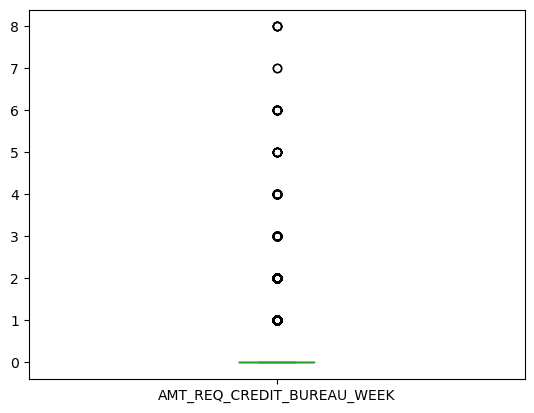

In [383]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].plot.box()
plt.show()

In [67]:
application_data.isnull().sum().sort_values(ascending=False).head(60)

AMT_REQ_CREDIT_BUREAU_DAY       41519
SK_ID_CURR                          0
DEF_30_CNT_SOCIAL_CIRCLE            0
FLAG_DOCUMENT_5                     0
FLAG_DOCUMENT_4                     0
FLAG_DOCUMENT_3                     0
FLAG_DOCUMENT_2                     0
DAYS_LAST_PHONE_CHANGE              0
DEF_60_CNT_SOCIAL_CIRCLE            0
OBS_60_CNT_SOCIAL_CIRCLE            0
OBS_30_CNT_SOCIAL_CIRCLE            0
FLAG_DOCUMENT_7                     0
EMERGENCYSTATE_MODE                 0
TOTALAREA_MODE                      0
FLOORSMAX_MEDI                      0
YEARS_BEGINEXPLUATATION_MEDI        0
FLOORSMAX_MODE                      0
YEARS_BEGINEXPLUATATION_MODE        0
FLOORSMAX_AVG                       0
FLAG_DOCUMENT_6                     0
FLAG_DOCUMENT_8                     0
EXT_SOURCE_3                        0
FLAG_DOCUMENT_18                    0
AMT_REQ_CREDIT_BUREAU_QRT           0
AMT_REQ_CREDIT_BUREAU_MON           0
AMT_REQ_CREDIT_BUREAU_WEEK          0
AMT_REQ_CRED

In [385]:
##Treating column(AMT_REQ_CREDIT_BUREAU_DAY)

In [386]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [387]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

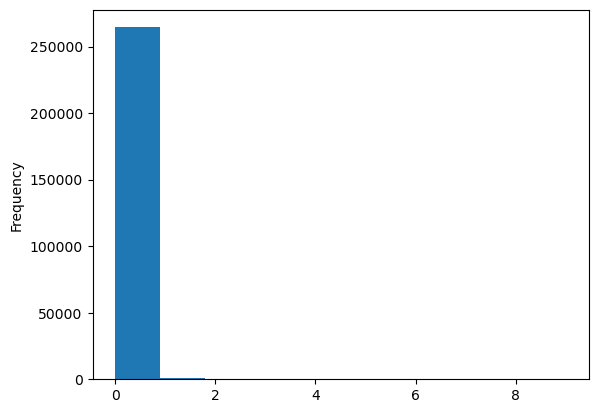

In [388]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].plot.hist()
plt.show()

In [68]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'] = application_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_DAY'].median())

In [390]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

0

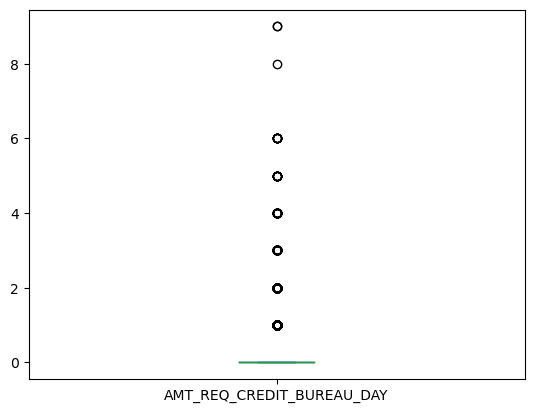

In [391]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].plot.box()
plt.show()

In [69]:
application_data.isnull().sum().sort_values(ascending=False).head(60)

SK_ID_CURR                      0
EXT_SOURCE_3                    0
FLAG_DOCUMENT_6                 0
FLAG_DOCUMENT_5                 0
FLAG_DOCUMENT_4                 0
FLAG_DOCUMENT_3                 0
FLAG_DOCUMENT_2                 0
DAYS_LAST_PHONE_CHANGE          0
DEF_60_CNT_SOCIAL_CIRCLE        0
OBS_60_CNT_SOCIAL_CIRCLE        0
DEF_30_CNT_SOCIAL_CIRCLE        0
OBS_30_CNT_SOCIAL_CIRCLE        0
EMERGENCYSTATE_MODE             0
TOTALAREA_MODE                  0
FLOORSMAX_MEDI                  0
YEARS_BEGINEXPLUATATION_MEDI    0
FLOORSMAX_MODE                  0
YEARS_BEGINEXPLUATATION_MODE    0
FLOORSMAX_AVG                   0
FLAG_DOCUMENT_7                 0
FLAG_DOCUMENT_8                 0
FLAG_DOCUMENT_9                 0
FLAG_DOCUMENT_19                0
AMT_REQ_CREDIT_BUREAU_QRT       0
AMT_REQ_CREDIT_BUREAU_MON       0
AMT_REQ_CREDIT_BUREAU_WEEK      0
AMT_REQ_CREDIT_BUREAU_DAY       0
AMT_REQ_CREDIT_BUREAU_HOUR      0
FLAG_DOCUMENT_21                0
FLAG_DOCUMENT_

In [70]:
application_data.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 81, dtype: int64

In [395]:
## Data cleaning process done.
## All the column with missing values treated.
## No such column with irriregulaties left.

In [ ]:
# Data analysis

In [4]:
## First we can check that in gender column how many are males and females.

In [73]:
application_data.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.265474,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.000000,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.000000,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.265474,1.0


In [8]:
application_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [9]:
## Showing XNA which is error or unwanted category so we have to treat it now.
## We can replace XNA with 'F'.

In [10]:
application_data.loc[application_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'
application_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [11]:
# Describing the organization type column

In [72]:
application_data['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [74]:
application_data=application_data.drop(application_data.loc[application_data['ORGANIZATION_TYPE']=='XNA'].index)
application_data[application_data['ORGANIZATION_TYPE']=='XNA'].shape

(0, 81)

In [76]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

application_data['AMT_INCOME_RANGE']=pd.cut(application_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [77]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

application_data['AMT_CREDIT_RANGE']=pd.cut(application_data['AMT_CREDIT'],bins=bins,labels=slots)

In [80]:
# Dividing the dataset into two dataset of target=1(customer with payment issues) and target=0(all other)

target0_application_data = application_data.loc[application_data["TARGET"]==0]
target1_application_data = application_data.loc[application_data["TARGET"]==1]

In [87]:
def uniplot(application_data,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(application_data[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = application_data, x= col, order=application_data[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

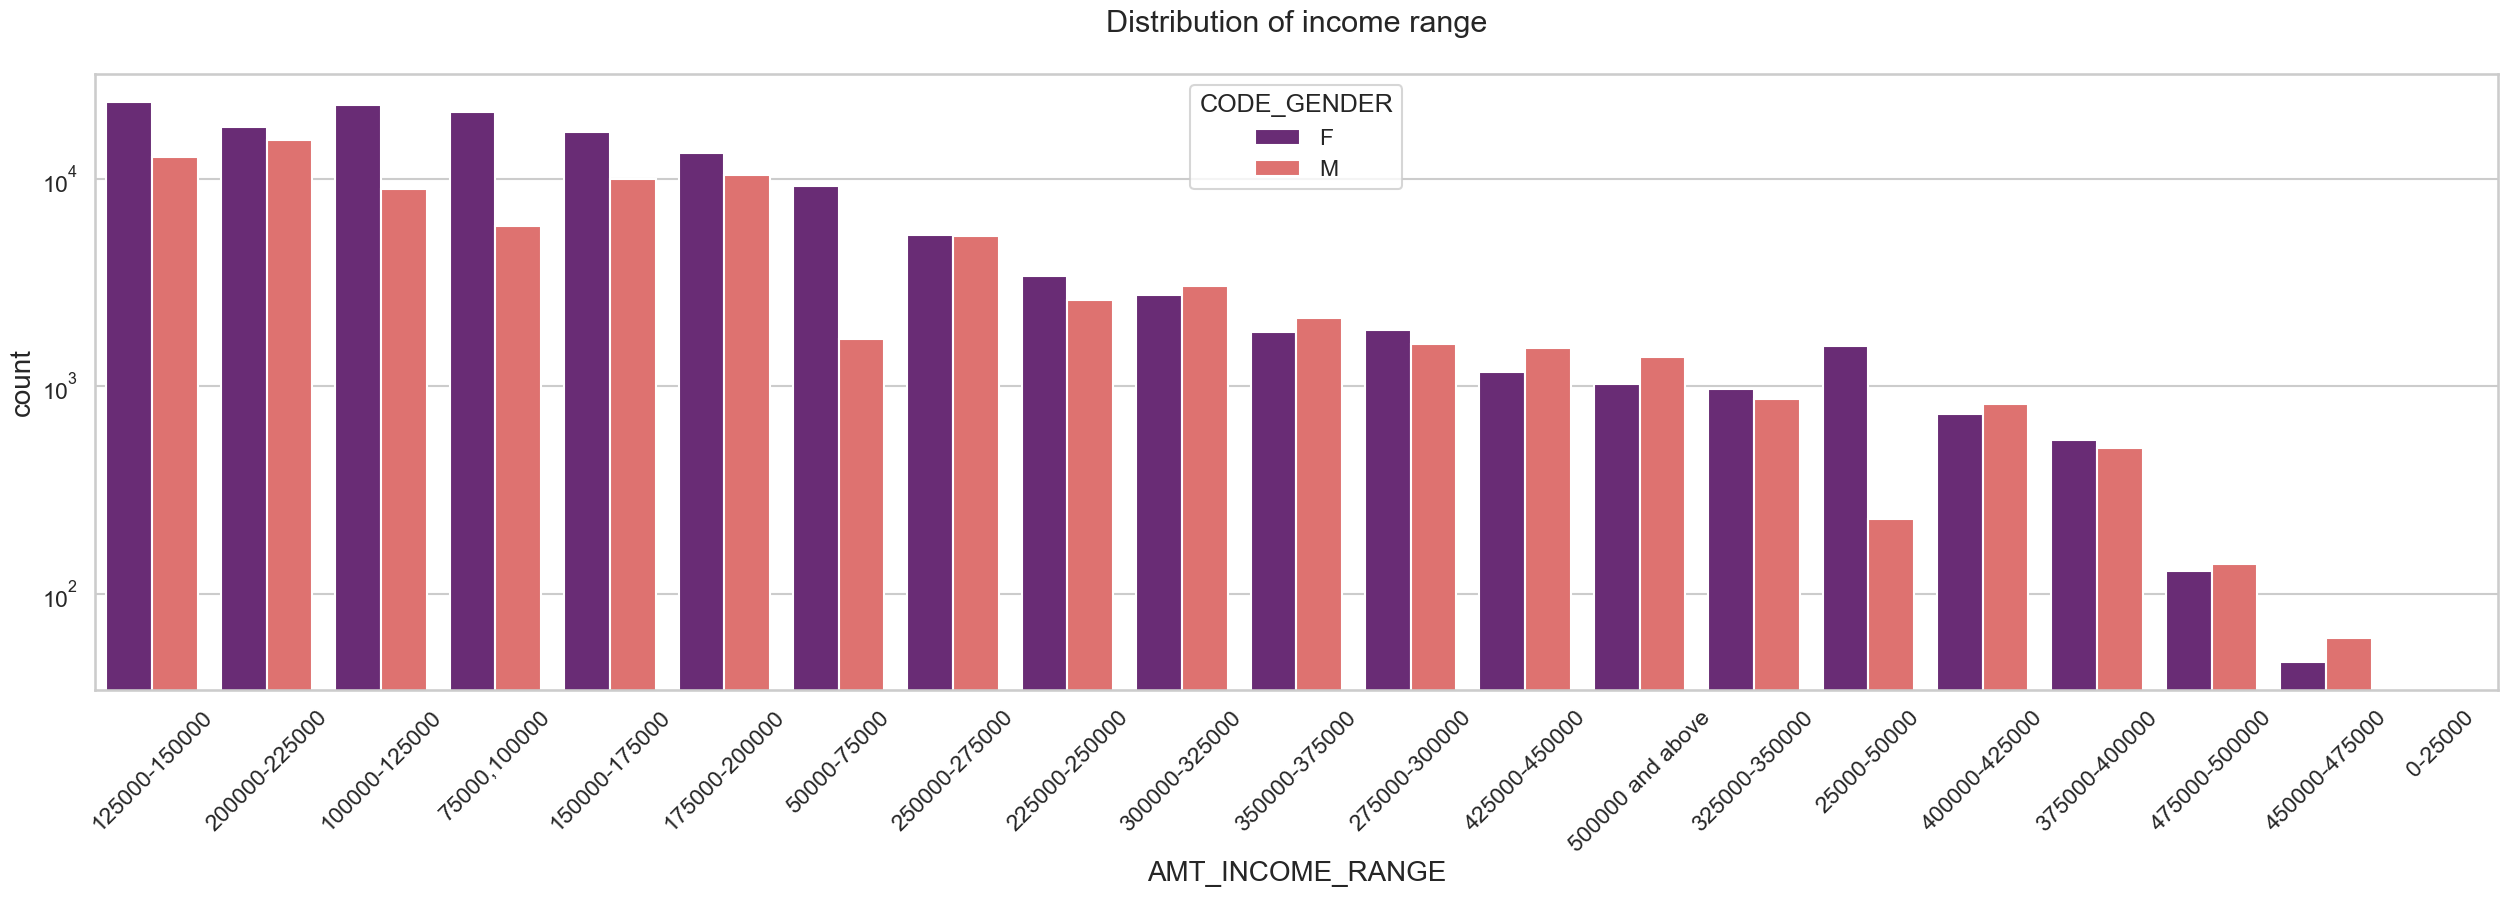

In [88]:
# PLotting for income range

uniplot(target0_application_data,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

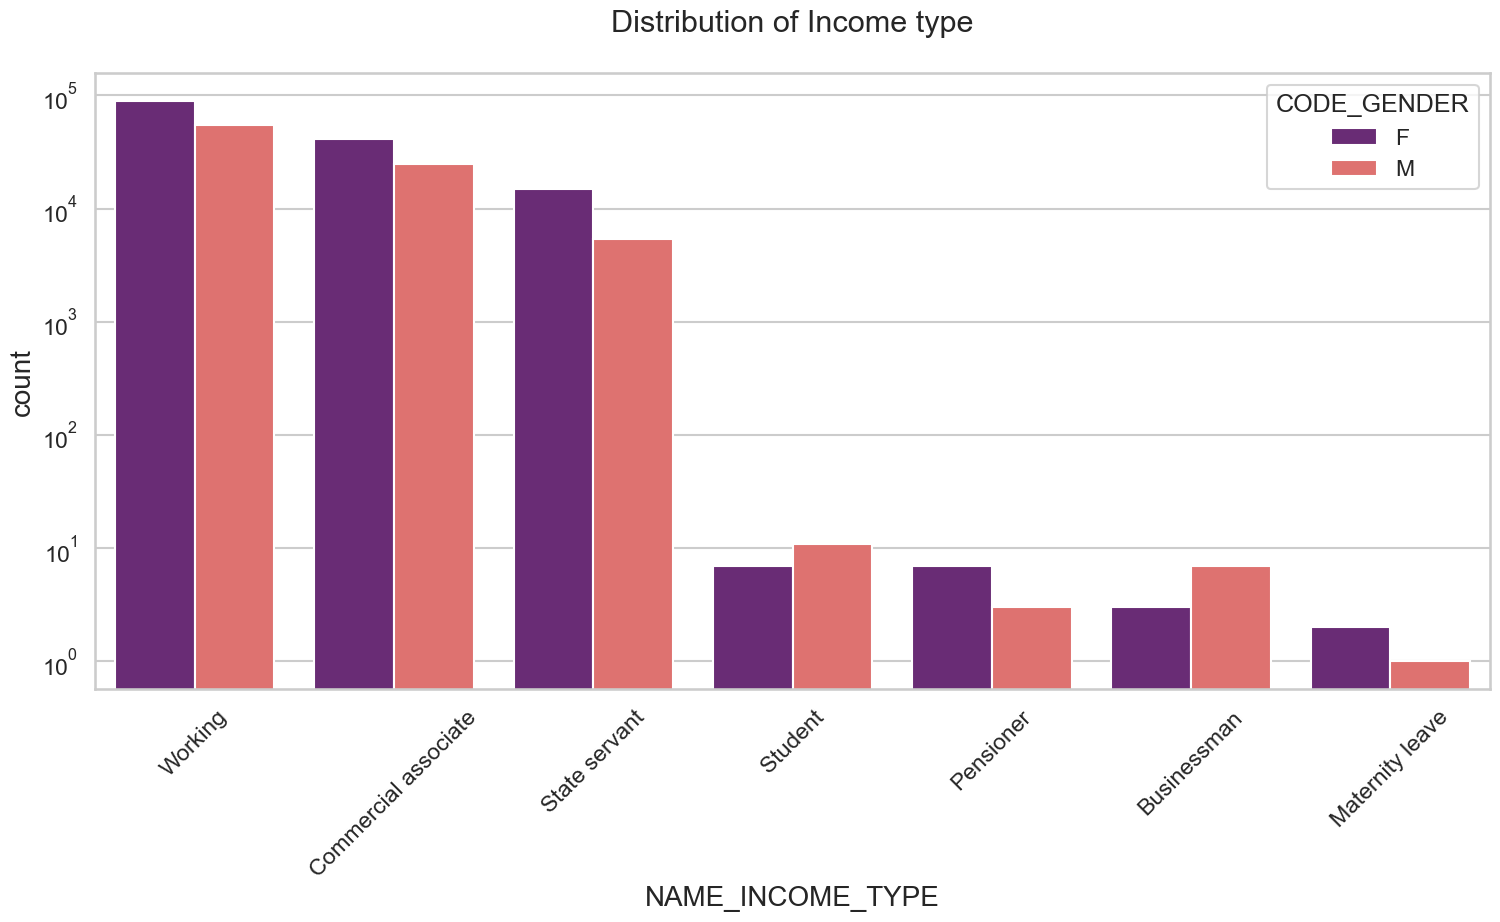

In [89]:
# Plotting for Income type

uniplot(target0_application_data,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

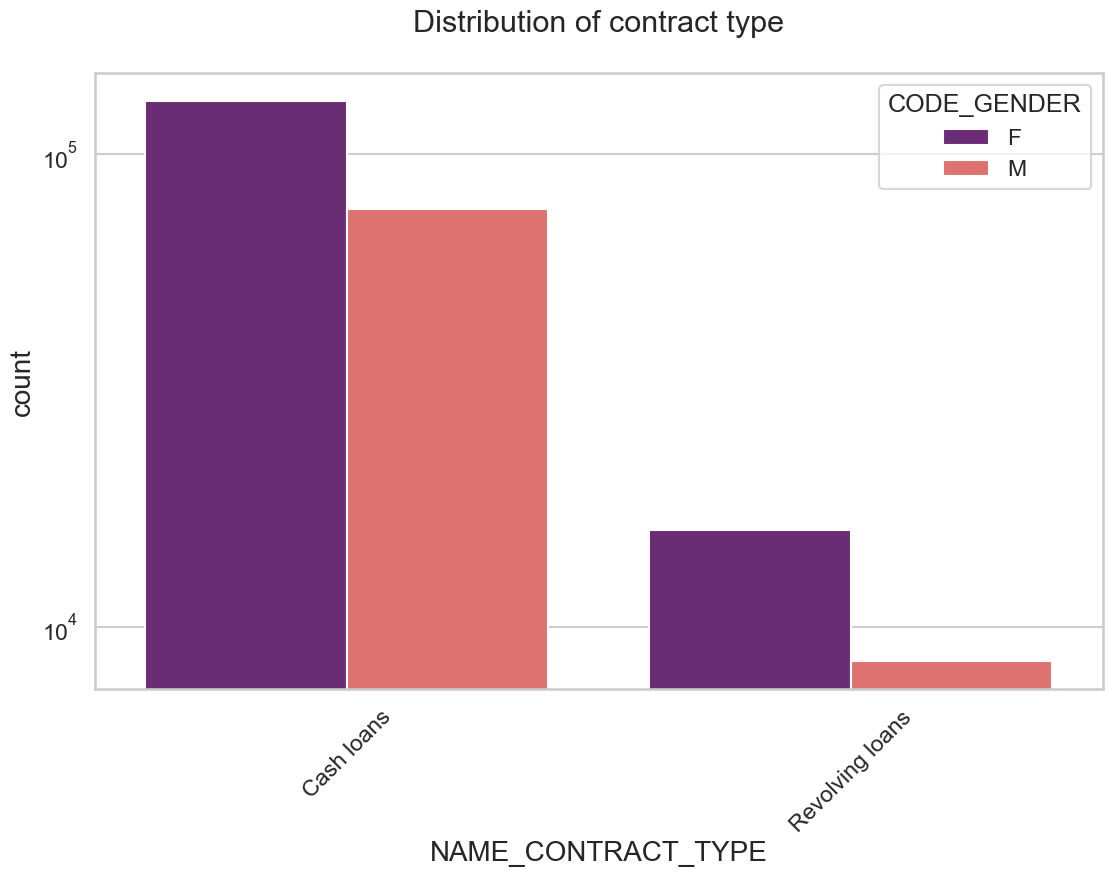

In [90]:
# Plotting for Contract type

uniplot(target0_application_data,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

In [105]:
# Finding top 10 correlation for numerical columns for both target 0 and 1 
Non_defaulter_application_data = application_data[application_data['TARGET'] == 0]
defaulter_application_data = application_data[application_data['TARGET'] == 1]


In [106]:
#to find the most correlated columns in non_defaulter_application_data
Non_defaulter_application_data.corr().unstack().sort_values(ascending = False).drop_duplicates()

SK_ID_CURR                   SK_ID_CURR                      1.000000
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE        0.998491
FLOORSMAX_AVG                FLOORSMAX_MEDI                  0.997301
YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MEDI    0.993080
FLOORSMAX_MEDI               FLOORSMAX_MODE                  0.988801
                                                               ...   
EXT_SOURCE_2                 REGION_RATING_CLIENT           -0.295321
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT_W_CITY    -0.540836
REGION_RATING_CLIENT         REGION_POPULATION_RELATIVE     -0.543381
FLAG_DOCUMENT_8              FLAG_DOCUMENT_3                -0.583541
SK_ID_CURR                   TARGET                               NaN
Length: 2213, dtype: float64

In [107]:
## From the above output, the top10 correlated columns are:
### 1.OBS_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE = 1.00
### 2.AMT_CREDIT_y AMT_APPLICATION = 0.97
### 3.DAYS_TERMINATION DAYS_LAST_DUE = 0.93
### 4.CNT_FAM_MEMBERS CNT_CHILDREN = 0.90
### 5.REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION = 0.88
### 6.DEF_30_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE = 0.87
### 7.AMT_GOODS_PRICE_y AMT_CREDIT_y = 0.86
### 8.AMT_APPLICATION AMT_GOODS_PRICE_y = 0.85
### 9.REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY = 0.83
### 10.AMT_CREDIT_y AMT_ANNUITY_y = 0.81

In [113]:
#making a dataframe with only the columns with high correlation
top10_CorrTarget0 = Non_defaulter_application_data[["OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "AMT_CREDIT", "DAYS_REGISTRATION", "DAYS_EMPLOYED", "CNT_FAM_MEMBERS", "CNT_CHILDREN", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "AMT_GOODS_PRICE", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "AMT_CREDIT", "AMT_ANNUITY"]].copy()

In [112]:
target0.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,-0.021950,-0.023652,-0.010795,-0.027084,-0.030579,0.266534,0.030948,0.155518,-0.119164,...,-0.005380,-0.001771,-0.000342,-0.004740,0.000606,0.001692,0.000941,-0.008106,-0.012029,-0.029067
AMT_INCOME_TOTAL,-0.021950,1.000000,0.403876,0.472204,0.408319,0.110074,-0.054666,-0.060868,0.040559,-0.036702,...,-0.006778,0.007115,0.001195,-0.003095,0.004924,0.009163,0.014558,0.076992,-0.015453,0.059186
AMT_CREDIT,-0.023652,0.403876,1.000000,0.826689,0.984499,0.060706,-0.169030,-0.104251,-0.015318,-0.038197,...,0.022033,0.017149,0.025501,-0.023671,-0.002374,0.001759,-0.002170,0.047880,-0.001572,-0.026607
AMT_ANNUITY,-0.010795,0.472204,0.826689,1.000000,0.823739,0.064328,-0.100287,-0.074643,0.010712,-0.027354,...,-0.024663,0.002826,0.011605,-0.026349,0.004442,0.003250,0.013836,0.046751,0.012997,0.007484
AMT_GOODS_PRICE,-0.027084,0.408319,0.984499,0.823739,1.000000,0.069873,-0.169015,-0.109297,-0.014990,-0.039771,...,0.018444,0.015878,0.025522,-0.021694,-0.001558,0.001925,-0.001203,0.049157,-0.001592,-0.028675


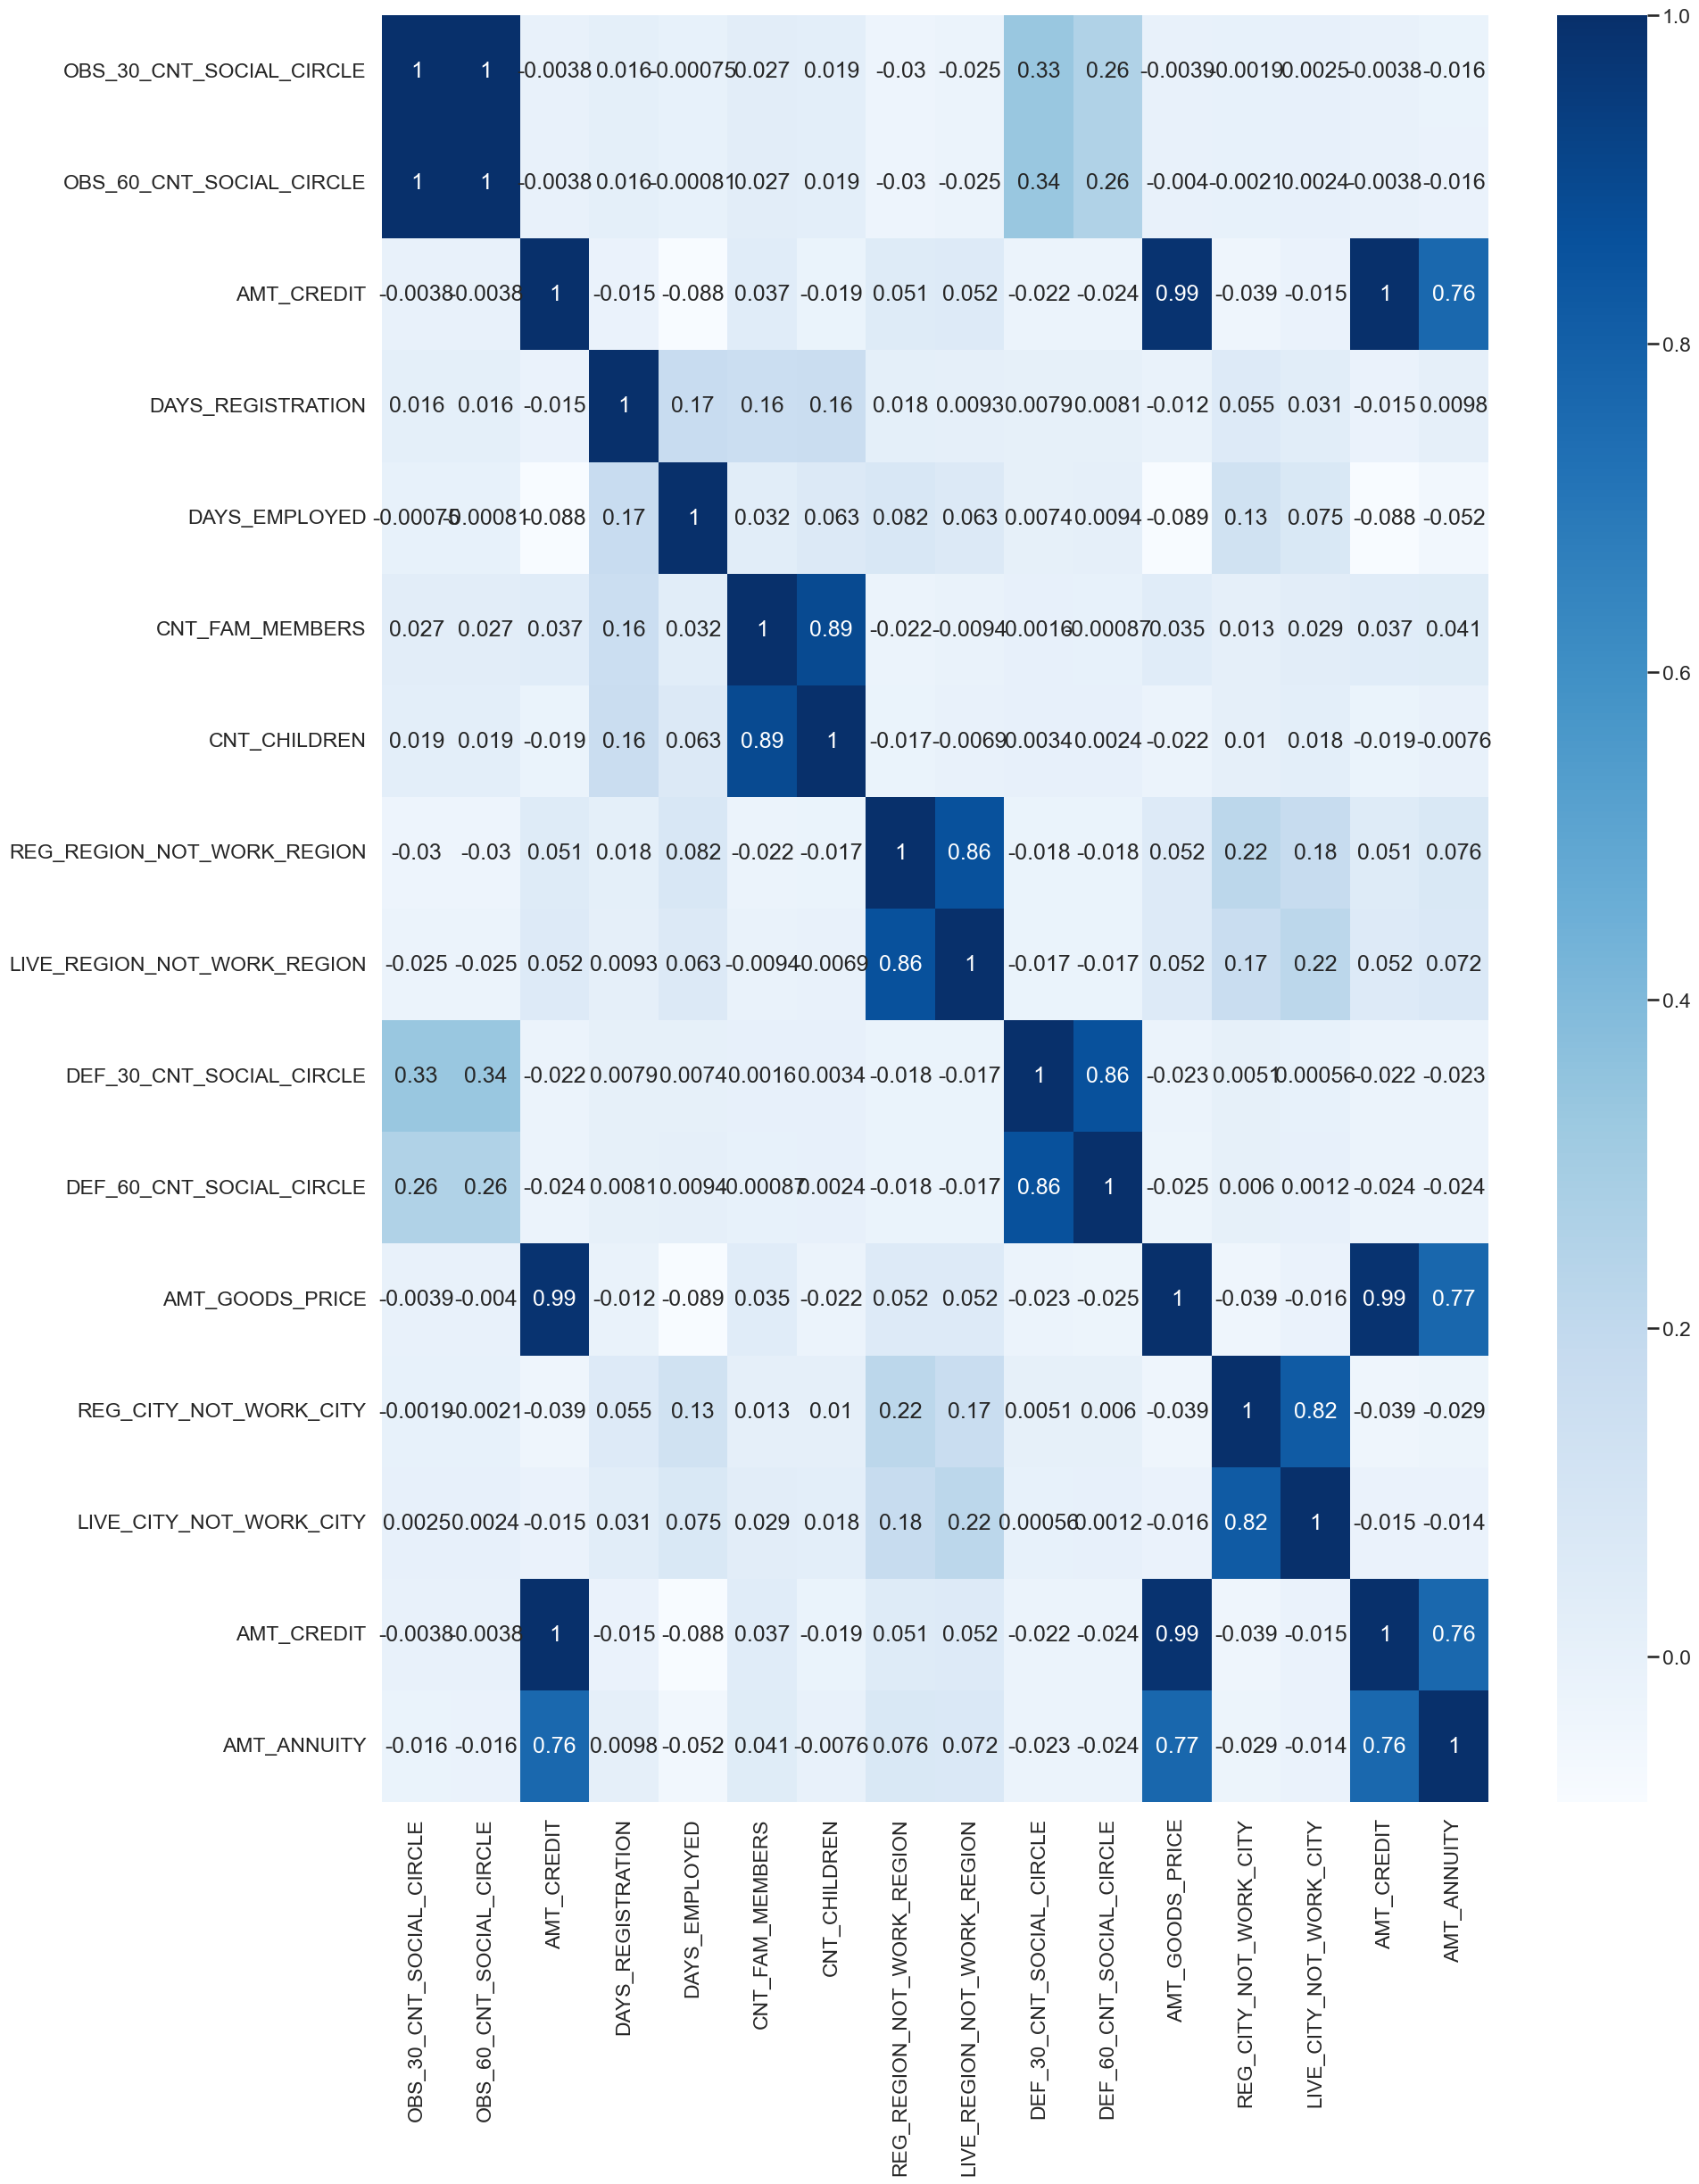

In [120]:
#Visually showcasing the top10 correlated columns through a heatmap

corr_target0 = top10_CorrTarget0.corr()

plt.figure(figsize = [20, 26])
sns.heatmap(data = corr_target0, cmap="Blues", annot=True)

plt.show()

In [123]:
## Inferences
### 1.AMT_GOODS_PRICE and AMT_APPLICATION have a high correlation, which means the more credit the client asked for previously is proportional to the goods price that the client asked for previously.
### 2.AMT_ANNUITY and AMT_APPLICATION also have a high correlation, which means the higher the loan annuity issued, the higher the goods price that the customer asked for previously.
### 3.If the customer's contact address does not match the work address, then there's a high chance that the customer's permanent address also does not match the work address.
### 4.CNT_CHILDREN and CNT_FAM_MEMBERS are highly correlated which means a customer with children is higly likely to have family members as well.

In [127]:
#to find the most correlated columns in defaulter_application_data.
defaulter_application_data.corr().unstack().sort_values(ascending = False).drop_duplicates()

SK_ID_CURR                    SK_ID_CURR                     1.000000
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE       0.998288
FLOORSMAX_AVG                 FLOORSMAX_MEDI                 0.997516
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG    0.995904
FLOORSMAX_MODE                FLOORSMAX_MEDI                 0.989049
                                                               ...   
HOUR_APPR_PROCESS_START       REGION_RATING_CLIENT          -0.289622
REGION_RATING_CLIENT          REGION_POPULATION_RELATIVE    -0.443159
REGION_RATING_CLIENT_W_CITY   REGION_POPULATION_RELATIVE    -0.447083
FLAG_DOCUMENT_3               FLAG_DOCUMENT_8               -0.643156
SK_ID_CURR                    TARGET                              NaN
Length: 1955, dtype: float64

In [126]:
# From the above output, the top10 correlated columns are:
### 1.OBS_60_CNT_SOCIAL_CIRCLE OBS_30_CNT_SOCIAL_CIRCLE = 1.00
### 2.AMT_APPLICATION AMT_CREDIT_y = 0.97
### 3.DAYS_TERMINATION DAYS_LAST_DUE = 0.95
### 4.CNT_FAM_MEMBERS CNT_CHILDREN = 0.90
### 5.LIVE_REGION_NOT_WORK_REGION REG_REGION_NOT_WORK_REGION = 0.87
### 6.DEF_30_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE = 0.86
### 7.AMT_CREDIT_y AMT_ANNUITY_y = 0.83
### 8.LIVE_CITY_NOT_WORK_CITY REG_CITY_NOT_WORK_CITY = 0.78
### 9.AMT_ANNUITY_y AMT_GOODS_PRICE_y = 0.76
### 10.AMT_ANNUITY_x AMT_CREDIT_x = 0.74

In [130]:
top10_CorrTarget1 = defaulter_application_data[["OBS_60_CNT_SOCIAL_CIRCLE", "OBS_30_CNT_SOCIAL_CIRCLE", "AMT_INCOME_TOTAL", "AMT_CREDIT", "DAYS_REGISTRATION", "DAYS_EMPLOYED", "CNT_FAM_MEMBERS", "CNT_CHILDREN", "LIVE_REGION_NOT_WORK_REGION", "REG_REGION_NOT_WORK_REGION", "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "AMT_ANNUITY", "LIVE_CITY_NOT_WORK_CITY", "REG_CITY_NOT_WORK_CITY", "AMT_GOODS_PRICE"]].copy()

In [129]:
target1.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,-0.039123,0.000427,0.015133,-0.005792,-0.029682,0.175025,0.006823,0.110854,-0.091042,...,0.001282,-0.004365,-0.001604,0.003511,-0.000694,-0.006995,0.001612,-0.017158,-0.023715,-0.023847
AMT_INCOME_TOTAL,-0.039123,1.000000,0.364559,0.428947,0.369080,0.058005,-0.103026,-0.053798,0.011378,-0.051113,...,-0.025381,0.000446,-0.005306,-0.002838,0.011622,-0.001456,0.028747,0.089452,-0.036394,0.085738
AMT_CREDIT,0.000427,0.364559,1.000000,0.812093,0.975458,0.043545,-0.200718,-0.107605,-0.021973,-0.065143,...,0.004294,0.007214,0.015865,-0.032209,0.004104,-0.003968,0.010071,0.052620,-0.047143,-0.007980
AMT_ANNUITY,0.015133,0.428947,0.812093,1.000000,0.805644,0.028666,-0.100200,-0.060193,0.019762,-0.044128,...,-0.044801,-0.004318,0.000248,-0.035121,0.012842,-0.002594,0.035096,0.061380,-0.010199,0.005776
AMT_GOODS_PRICE,-0.005792,0.369080,0.975458,0.805644,1.000000,0.058364,-0.198796,-0.116043,-0.023023,-0.069184,...,-0.000413,0.006374,0.014902,-0.030599,0.006946,-0.004166,0.012878,0.056629,-0.046658,-0.008408


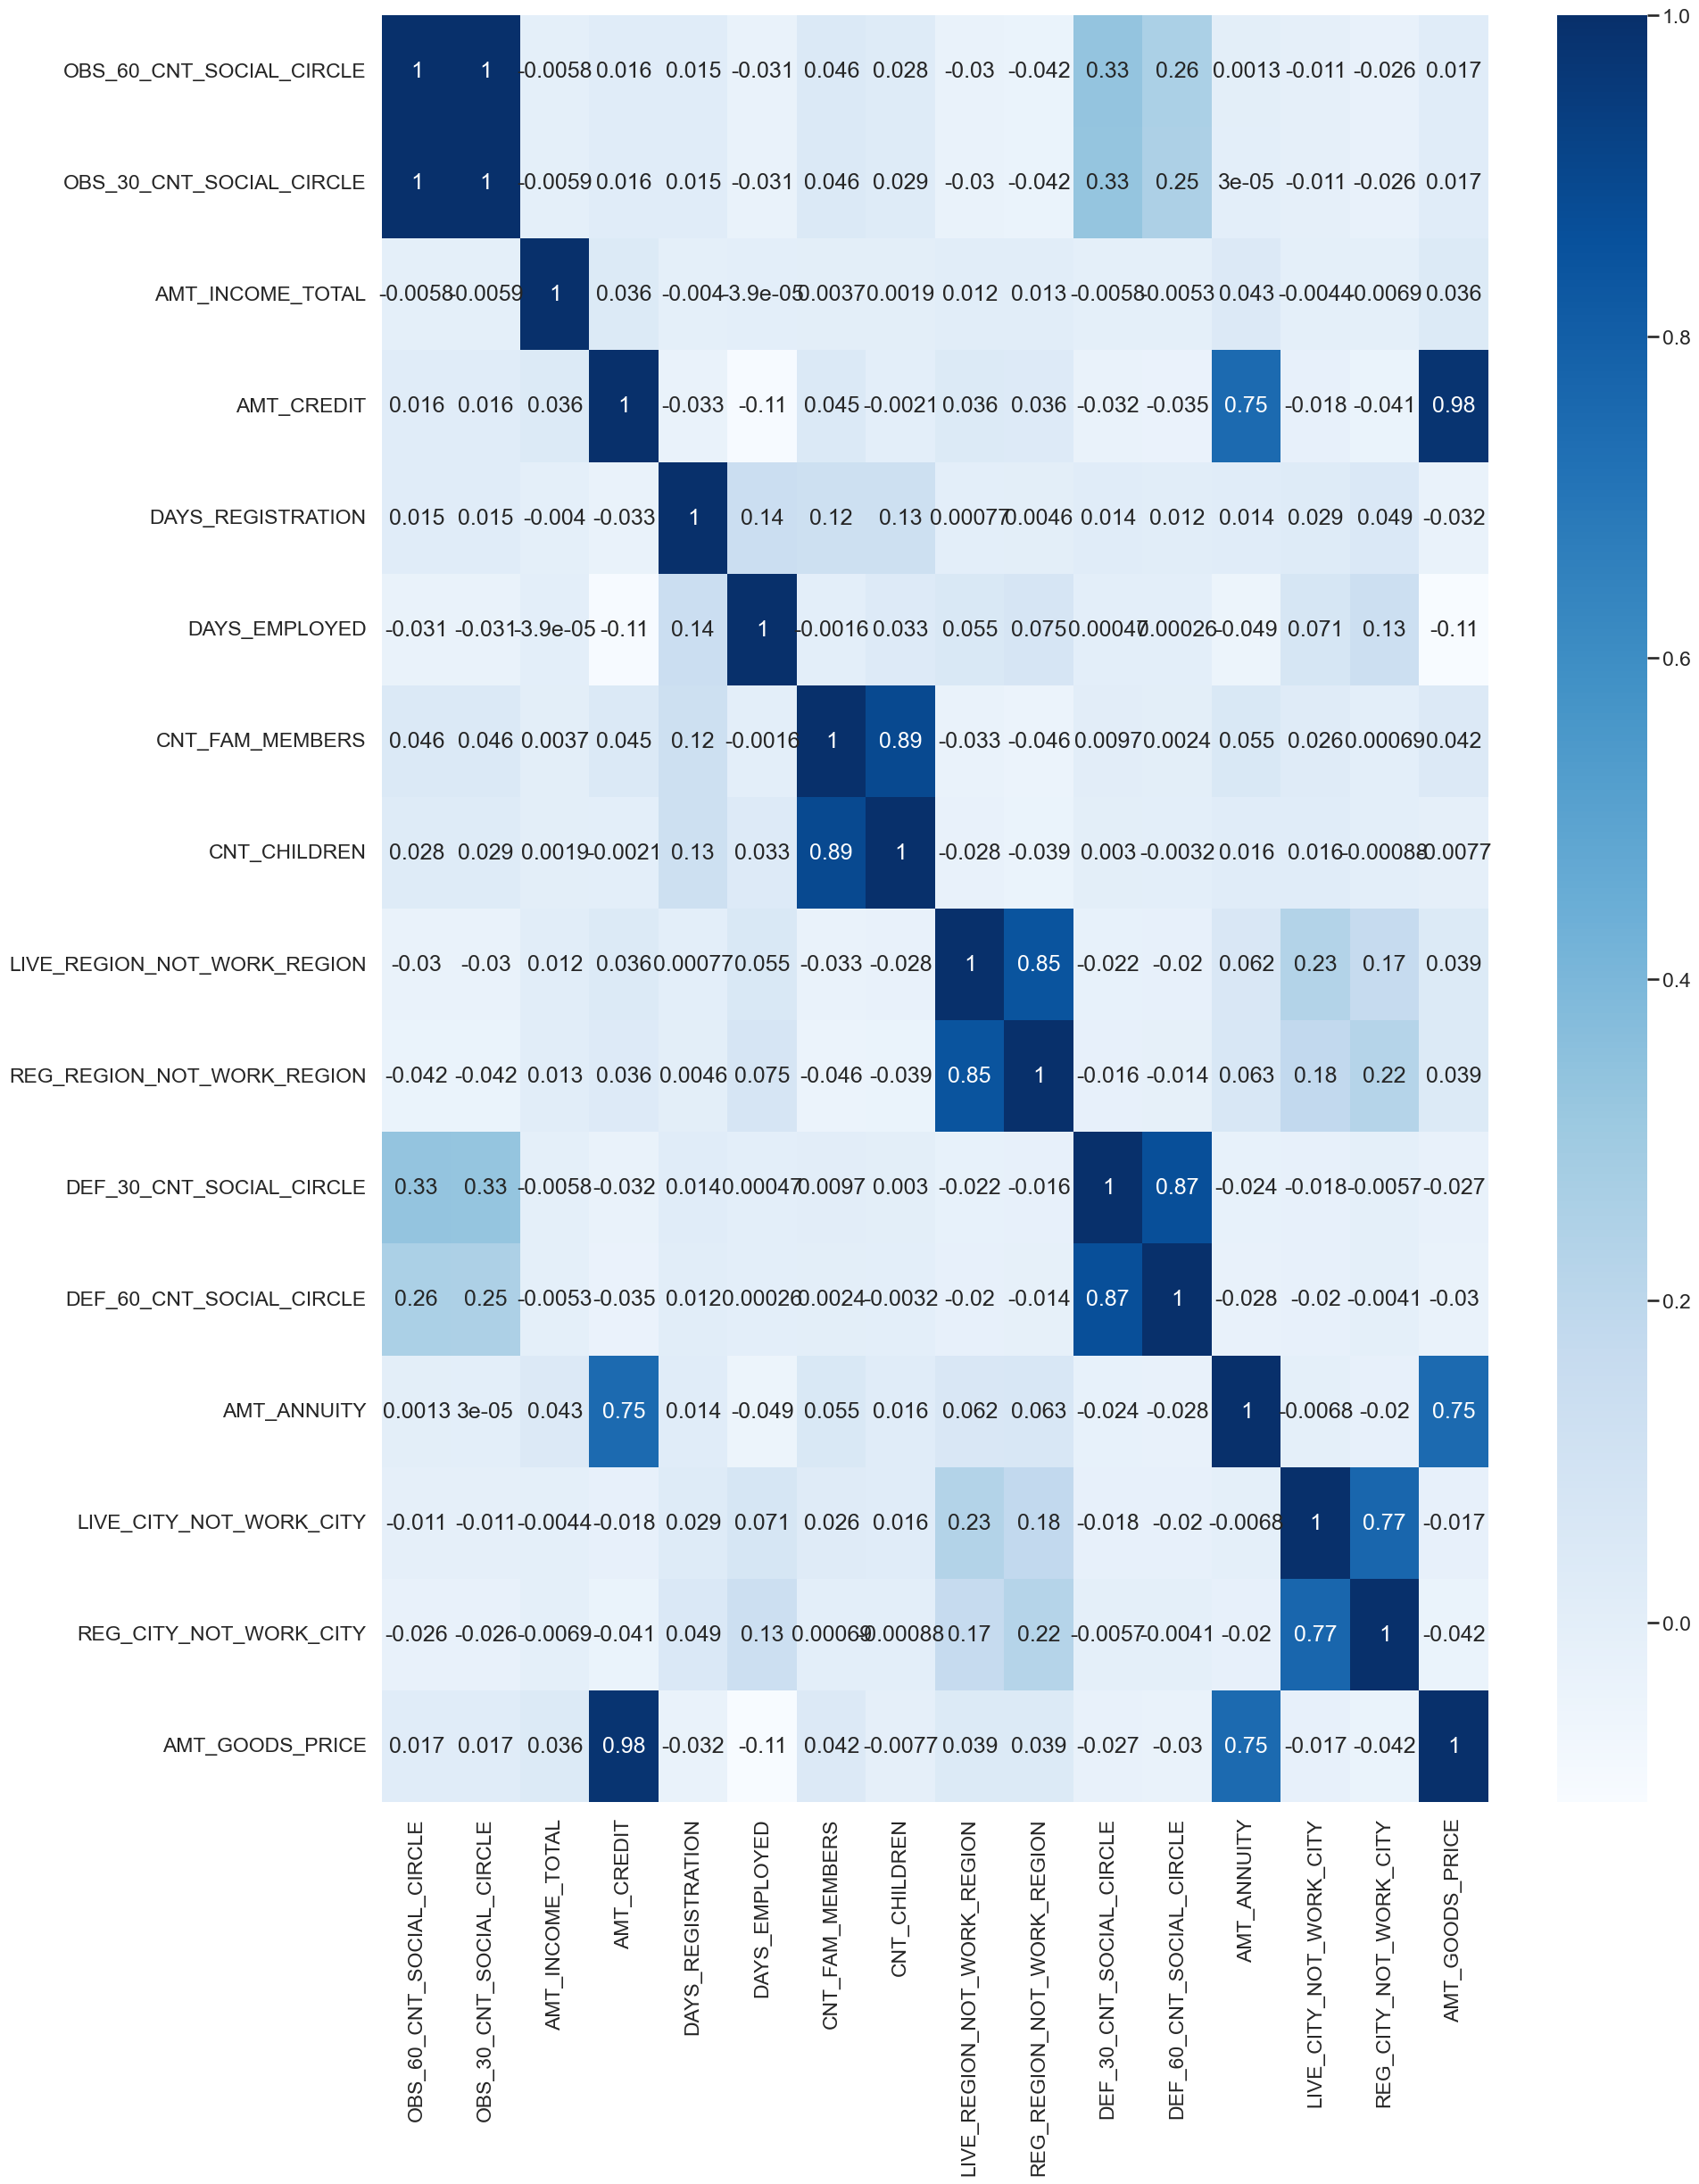

In [132]:
corr_target1 = top10_CorrTarget1.corr()

plt.figure(figsize = [20, 26])
sns.heatmap(data = corr_target1, cmap="Blues", annot=True)
plt.show()

In [ ]:
# Inferences:
### 1.In comparison to the Non_defaulter heatmap, AMT_GOODS_PRICE and AMT_APPLICATION have a high correlation here as well.
### 2.In comparison to the Non_defaulter heatmap, AMT_ANNUITY and AMT_APPLICATION also have a high correlation, which means the higher the loan annuity issued, the higher the goods price that the customer asked for previously.
### 3.CNT_CHILDREN and CNT_FAM_MEMBERS are highly correlated which means a customer with children is higly likely to have family members as well (same as with the Non_defaulter heatmap).
### 4.Higher the goods price, higher the credit by the customer.